<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Систем сбора и обработки данных </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №1</font></center>
<center><font size="3">по дисциплине: «Машинное обучение» </font></center>
<br>

Выполнил:
- _ _ _ Дмитриченко Д.А. _ _ _


<center>  Новосибирск, 2025  </center>


In [15]:
# Python 3.10
import pandas as pd
import numpy  as np
import category_encoders as ce

import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures # Импорт класса для создания полиномиальных признаков
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import os
from glob import glob

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPModel, CLIPTokenizer, CLIPImageProcessor, CLIPProcessor
from tqdm import tqdm

In [16]:
df = pd.read_excel("F:/VLM_Usability/Dataset/data/all_domains_valid2.xlsx")
df = df.drop(['Unnamed: 0'], axis=1)

df[200:212] # отобразить первые строки таблицы df

,filename,domain,Complexity,Aesthetics,Orderliness,VA_PNG,VA_JPEG,elements,elem. types,visual complex,...,Static clusters,DynamicCC (clusters),DynamicCC (avg cluster colors),QuadtreeDec (balance),QuadtreeDec (symmetry),QuadtreeDec (equilibrium),QuadtreeDec (leaves),whitespace,grid quality,count
200,titanicbelfast-com-.png,culture,3.7500,4.2500,4.2500,995792,1069013.0,27.0,5.0,1255.59,...,5737.0,759.0,11.0,0.926286,0.642126,0.999833,3490.0,0.296104,43.0,4
201,franklloydwright-org-.png,culture,4.2000,5.4000,5.2000,1374542,1072572.0,17.0,2.0,340.55,...,4566.0,1254.0,13.0,0.738113,0.573122,0.999776,2605.0,0.296153,55.0,5
202,www-schokoladenmuseum-de-en-.png,culture,3.5714,4.8571,5.0000,839165,760484.0,19.0,4.0,742.39,...,4524.0,288.0,14.0,0.793580,0.589837,0.999706,1987.0,0.674203,72.0,7
203,klughaus-net-.png,culture,3.8000,5.4000,5.8000,1759091,1282527.0,5.0,2.0,101.45,...,3121.0,1412.0,13.0,0.935366,0.615957,0.999845,3769.0,-0.014828,74.0,5
204,fruitlands-thetrustees-org-.png,culture,2.5000,5.7500,5.5000,1757092,1438621.0,11.0,3.0,356.65,...,4384.0,1296.0,15.0,0.887877,0.516724,0.999802,2941.0,0.209687,78.0,4
205,www-samuseum-org-.png,culture,3.2500,2.5000,3.2500,181677,306916.0,13.0,3.0,375.57,...,2132.0,148.0,12.0,0.406932,0.502148,0.999440,1042.0,0.196296,31.0,4
206,www-davidzwirner-com-.png,culture,4.1667,4.6667,4.5000,1501773,1071591.0,15.0,3.0,476.23,...,5660.0,952.0,14.0,0.844840,0.595033,0.999796,2857.0,0.258454,42.0,6
207,www-nationalgallery-gr-el-.png,culture,3.1667,3.3333,3.6667,2062197,1299754.0,1.0,2.0,20.31,...,1460.0,1456.0,18.0,0.937398,0.632279,0.999857,4075.0,-0.057196,114.0,6
208,npg-si-edu-.png,culture,3.0000,5.0000,6.0000,1305696,920467.0,31.0,3.0,973.44,...,4329.0,863.0,13.0,0.892606,0.630021,0.999811,3094.0,0.271006,73.0,4
209,high-org-close.png,culture,3.6000,4.6000,5.2000,642310,531372.0,9.0,5.0,397.45,...,2245.0,303.0,12.0,0.830488,0.566894,0.999706,1981.0,0.294530,77.0,5


In [17]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(3084, 38)
Итого: 3084 записи, 38 столбец (признак).


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   filename                          3084 non-null   object 
 1   domain                            3084 non-null   object 
 2   Complexity                        3084 non-null   float64
 3   Aesthetics                        3084 non-null   float64
 4   Orderliness                       3084 non-null   float64
 5   VA_PNG                            3084 non-null   int64  
 6   VA_JPEG                           3084 non-null   float64
 7   elements                          3084 non-null   float64
 8   elem. types                       3084 non-null   float64
 9   visual complex                    3084 non-null   float64
 10  edge congestion                   3084 non-null   float64
 11  unique RGB                        3084 non-null   float64
 12  HSVcol

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Complexity,3084.0,3.711385,0.825807,1.000000,3.200000,3.750000,4.250000e+00,6.500000e+00
Aesthetics,3084.0,4.166481,0.976440,1.000000,3.500000,4.250000,4.800000e+00,7.000000e+00
Orderliness,3084.0,4.342670,0.862815,1.000000,3.750000,4.375000,5.000000e+00,6.800000e+00
VA_PNG,3084.0,885219.845006,529162.422219,45025.000000,525623.750000,776375.000000,1.124643e+06,3.569335e+06
VA_JPEG,3084.0,889623.080415,474547.771009,99371.000000,610539.750000,765455.500000,1.007100e+06,3.472174e+06
elements,3084.0,27.944553,22.066566,1.000000,15.000000,22.000000,3.400000e+01,3.370000e+02
elem. types,3084.0,4.430285,1.279344,2.000000,4.000000,4.000000,5.000000e+00,9.000000e+00
visual complex,3084.0,1247.584339,1220.138792,18.860000,533.977500,908.230000,1.498013e+03,1.506693e+04
edge congestion,3084.0,0.252365,0.082196,0.001155,0.194335,0.252909,3.055589e-01,8.774010e-01
unique RGB,3084.0,13741.601816,10061.431926,205.000000,6233.500000,11413.000000,1.900625e+04,5.991900e+04


In [20]:
# описание для НЕ числовых значений, при их наличии
if (df.dtypes == 'object').sum() >0:
    print(df.describe(include=['object', 'bool']).T )

         count unique               top freq
filename  3084   3083  www-who-int-.png    2
domain    3084      7           culture  746


## Изменение названия признаков

In [21]:
df.columns

Index(['filename', 'domain', 'Complexity', 'Aesthetics', 'Orderliness',
       'VA_PNG', 'VA_JPEG', 'elements', 'elem. types', 'visual complex',
       'edge congestion', 'unique RGB', 'HSVcolours (avg Hue)',
       'HSVcolours (avg Saturation)', 'HSVcolours (std Saturation)',
       'HSVcolours (avg Value)', 'HSVcolours (std Value)', 'HSVspectrum (HSV)',
       'HSVspectrum (Hue)', 'HSVspectrum (Saturation)', 'HSVspectrum (Value)',
       'Hassler-Susstrunk (dist A)', 'Hassler-Susstrunk (std A)',
       'Hassler-Susstrunk (dist B)', 'Hassler-Susstrunk (std B)',
       'Hassler-Susstrunk (dist RGYB)', 'Hassler-Susstrunk (std RGYB)',
       'Hassler-Susstrunk (Colorfulness)', 'Static clusters',
       'DynamicCC (clusters)', 'DynamicCC (avg cluster colors)',
       'QuadtreeDec (balance)', 'QuadtreeDec (symmetry)',
       'QuadtreeDec (equilibrium)', 'QuadtreeDec (leaves)', 'whitespace',
       'grid quality', 'count'],
      dtype='object')

## Пропущенные значения

In [10]:
print ( df.isna().sum() ) # используем print для компактного вывода

filename                            0
domain                              0
Complexity                          0
Aesthetics                          0
Orderliness                         0
VA_PNG                              0
VA_JPEG                             0
elements                            0
elem. types                         0
visual complex                      0
edge congestion                     0
unique RGB                          0
HSVcolours (avg Hue)                0
HSVcolours (avg Saturation)         0
HSVcolours (std Saturation)         0
HSVcolours (avg Value)              0
HSVcolours (std Value)              0
HSVspectrum (HSV)                   0
HSVspectrum (Hue)                   0
HSVspectrum (Saturation)            0
HSVspectrum (Value)                 0
Hassler-Susstrunk (dist A)          0
Hassler-Susstrunk (std A)           0
Hassler-Susstrunk (dist B)          0
Hassler-Susstrunk (std B)           0
Hassler-Susstrunk (dist RGYB)       0
Hassler-Suss

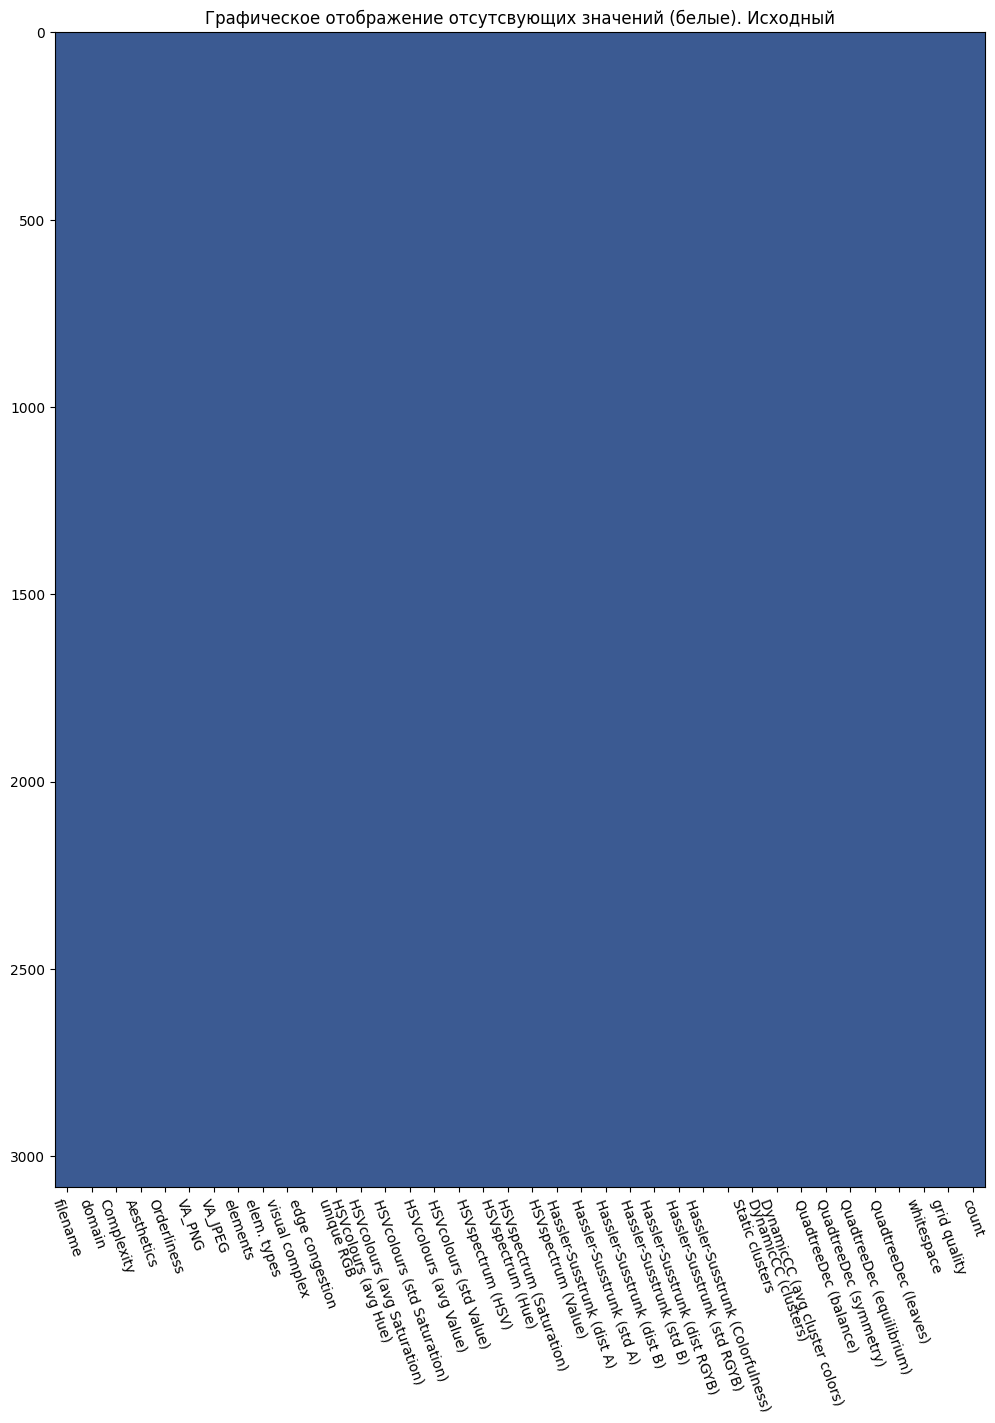

In [11]:
from matplotlib.colors import ListedColormap
def plotTableNA(dataF, addToTilte =""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if   len(dataF.columns)> 20:   K = 3
    elif len(dataF.columns)== 1:   K = 1
    else:                          K = 1.7

    figSizeH = 15        # размер полотна, высота
    figSizeW =int(len(dataF.columns)/K) # размер полотна, ширина
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH)) # создать полотно для рисования, figsize-размер в дюймах

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра
    plt.imshow( dataF.isna(),
                cmap = ListedColormap([ '#3B5A92', 'white', ]), # выбор цветовой шкалы, аналог cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]    # режим соотнощения сторон
                interpolation= 'none',)                         # отключить размытие
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70,)
    plt.title("Графическое отображение отсутсвующих значений (белые). "+ addToTilte)
    plt.grid(False) # Сетка
#-------------------------------------
# Вызов функции с указанием параметров
plotTableNA( dataF=df, addToTilte="Исходный" )

In [12]:
print("Размер исходного DataFrame", df.shape)
print("Вар.3.1. Размер при исключении по строкам",  df.dropna(axis='index', how='any').shape)
print("Вар.3.2. Размер при исключении по столбцам", df.dropna(axis='columns', how='any').shape)

Размер исходного DataFrame (3084, 38)
Вар.3.1. Размер при исключении по строкам (3084, 38)
Вар.3.2. Размер при исключении по столбцам (3084, 38)


In [13]:
print ("Итого: " + str(df.shape[0]) + " записи, " + str(df.shape[1]) + " столбец (признак).")

Итого: 3084 записи, 38 столбец (признак).


### One-Hot encoding

One-Hot Encoding (OHE) — это метод кодирования категориальных признаков в числовой вид, при котором для каждого уникального значения признака создаётся отдельный бинарный (0/1) столбец.

Модели машинного обучения (линейная регрессия, логистическая регрессия, деревья решений и др.) работают только с числами. OHE позволяет представить категории так, чтобы модель видела их как набор независимых бинарных признаков.

In [22]:
df['domain'].unique() # получить массив уникальных значений в столбце

array(['culture', 'food', 'games', 'gov', 'health', 'news', 'univer'],
      dtype=object)

In [23]:
objColNames    = ['domain'] # названия признаков в исходной таблицы в виде списка
prefixColNames = ['domain_N']       # сокращенные названия признаков для новой таблицы в виде списка

df_dummies = pd.get_dummies(
    data   = df[objColNames],  # таблица с признаками для кодирования
    prefix = prefixColNames,   # сокращенные приставки к новым столбцам
    dtype  = int,              # результат сравнения в виде целых чисел {0,1}
)

df = pd.concat([df, df_dummies], axis=1)
df_dummies[:3] # осмотрим перые строки новой таблицы

,domain_N_culture,domain_N_food,domain_N_games,domain_N_gov,domain_N_health,domain_N_news,domain_N_univer
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [27]:
df.shape

(3083, 46)

### Удаление нечисловых столбцов

In [28]:
df_numeric = df.select_dtypes(include=['number'])

In [18]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Complexity                        3084 non-null   float64
 1   Aesthetics                        3084 non-null   float64
 2   Orderliness                       3084 non-null   float64
 3   VA_PNG                            3084 non-null   int64  
 4   VA_JPEG                           3084 non-null   float64
 5   elements                          3084 non-null   float64
 6   elem. types                       3084 non-null   float64
 7   visual complex                    3084 non-null   float64
 8   edge congestion                   3084 non-null   float64
 9   unique RGB                        3084 non-null   float64
 10  HSVcolours (avg Hue)              3084 non-null   float64
 11  HSVcolours (avg Saturation)       3084 non-null   float64
 12  HSVcol

In [19]:
df_numeric.shape

(3084, 43)

In [20]:
# описание для НЕ числовых значений, при их наличии
if (df_numeric.dtypes == 'object').sum() >0:
    print(df_numeric.describe(include=['object', 'bool']).T )

# Формирование тренировочной и проверочной выборок

In [9]:
target = ['Complexity', 'Aesthetics', 'Orderliness']
target_A = ['Aesthetics']

In [22]:
valid_size = 0.2 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_numeric.drop(columns=target),  # все столбцы, кроме target
    df_numeric[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)

In [23]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(y_test),
    len(x_train)+len(x_test), len(y_train)+len(y_test),
))

Кол-во элементов: 
  x_train: 2467, y_train 2467 
  x_test:  617, y_test  617 
  total x: 3084, total y 3084 


In [24]:
x_test[:3]

,VA_PNG,VA_JPEG,elements,elem. types,visual complex,edge congestion,unique RGB,HSVcolours (avg Hue),HSVcolours (avg Saturation),HSVcolours (std Saturation),...,whitespace,grid quality,count,domain_N_culture,domain_N_food,domain_N_games,domain_N_gov,domain_N_health,domain_N_news,domain_N_univer
2273,291836,532985.0,32.0,7.0,1709.00,0.211779,3041.0,359.295032,0.128533,0.234488,...,-0.164701,126.0,4,0,0,0,0,1,0,0
481,1297888,1172894.0,17.0,4.0,685.50,0.297626,24021.0,230.168613,0.511957,0.351393,...,-0.026936,77.0,4,1,0,0,0,0,0,0
1487,349565,627774.0,26.0,5.0,1162.72,0.382370,3833.0,3.737922,0.153438,0.332485,...,0.594315,142.0,4,0,0,0,1,0,0,0


## Формирование таблицы с строго числовыми значениями

In [25]:
# описание для числовых значений. Оператор ".T" транспонирует матрицу для удобства чтения
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
VA_PNG,617.0,868910.448947,519320.825665,56216.000000,517178.000000,758228.000000,1.085494e+06,3.150519e+06
VA_JPEG,617.0,881392.249595,453177.753185,129480.000000,612578.000000,765170.000000,9.938270e+05,2.957654e+06
elements,617.0,28.092382,20.067165,1.000000,15.000000,23.000000,3.600000e+01,2.120000e+02
elem. types,617.0,4.426256,1.246355,2.000000,4.000000,4.000000,5.000000e+00,8.000000e+00
visual complex,617.0,1242.326807,1107.661885,19.690000,560.350000,946.570000,1.537160e+03,1.233005e+04
edge congestion,617.0,0.253758,0.082262,0.015155,0.196220,0.250845,3.061284e-01,8.604432e-01
unique RGB,617.0,13569.933549,10424.775409,299.000000,6140.000000,11389.000000,1.859100e+04,5.991900e+04
HSVcolours (avg Hue),617.0,150.057228,151.779015,0.068502,8.946556,50.361594,3.348106e+02,3.599704e+02
HSVcolours (avg Saturation),617.0,0.220778,0.136264,0.001220,0.117329,0.192155,2.930770e-01,8.893713e-01
HSVcolours (std Saturation),617.0,0.271752,0.083126,0.005089,0.214504,0.278929,3.313968e-01,4.655360e-01


# Выбор целевого значения и признаков для анализа данных

In [26]:
train_with_target = pd.concat([x_train, y_train], axis=1)
corr_df = train_with_target.corr(method='pearson')
corr_df

,VA_PNG,VA_JPEG,elements,elem. types,visual complex,edge congestion,unique RGB,HSVcolours (avg Hue),HSVcolours (avg Saturation),HSVcolours (std Saturation),...,domain_N_culture,domain_N_food,domain_N_games,domain_N_gov,domain_N_health,domain_N_news,domain_N_univer,Complexity,Aesthetics,Orderliness
VA_PNG,1.000000,0.900266,0.283307,0.041592,0.333280,-0.009045,0.791333,-0.070027,0.290811,0.224230,...,-0.023831,-0.021746,0.015764,-0.183587,-0.185814,-0.151548,0.561393,-0.077813,0.231160,0.159762
VA_JPEG,0.900266,1.000000,0.527606,0.230992,0.579234,0.214311,0.621033,0.005374,0.258486,0.295283,...,-0.128027,-0.089023,-0.036688,-0.135578,-0.168133,-0.126792,0.722600,0.000391,0.081084,0.078868
elements,0.283307,0.527606,1.000000,0.498344,0.976866,0.387739,0.030900,0.103967,-0.102698,0.130472,...,-0.216155,-0.134328,-0.178958,-0.018012,-0.047467,0.032913,0.621627,0.128896,-0.162231,-0.068804
elem. types,0.041592,0.230992,0.498344,1.000000,0.606626,0.305850,-0.120157,0.059899,-0.201881,0.051006,...,-0.191627,-0.048395,-0.161068,0.027882,-0.017661,0.083520,0.365229,0.118602,-0.133638,-0.072669
visual complex,0.333280,0.579234,0.976866,0.606626,1.000000,0.381980,0.073646,0.103513,-0.095360,0.135101,...,-0.217726,-0.127245,-0.170217,-0.029000,-0.065871,0.017060,0.654244,0.114972,-0.138883,-0.055766
edge congestion,-0.009045,0.214311,0.387739,0.305850,0.381980,1.000000,-0.158712,0.113181,-0.195019,0.002421,...,-0.181896,-0.188978,-0.111689,0.136675,-0.044848,0.115447,0.339867,0.181487,-0.301678,-0.178889
unique RGB,0.791333,0.621033,0.030900,-0.120157,0.073646,-0.158712,1.000000,-0.086631,0.348318,0.138579,...,0.017268,-0.046237,0.077420,-0.145300,-0.053564,-0.159723,0.293382,-0.123169,0.301259,0.202635
HSVcolours (avg Hue),-0.070027,0.005374,0.103967,0.059899,0.103513,0.113181,-0.086631,1.000000,0.035495,0.066530,...,-0.083029,-0.199206,0.081361,0.091117,0.065012,0.004677,0.055597,0.003848,-0.079640,-0.031488
HSVcolours (avg Saturation),0.290811,0.258486,-0.102698,-0.201881,-0.095360,-0.195019,0.348318,0.035495,1.000000,0.693767,...,0.097470,-0.098271,0.197988,-0.055407,-0.003407,-0.173229,-0.005538,-0.054948,0.164746,0.081047
HSVcolours (std Saturation),0.224230,0.295283,0.130472,0.051006,0.135101,0.002421,0.138579,0.066530,0.693767,1.000000,...,-0.011995,-0.063894,-0.002452,-0.032509,0.002931,-0.044310,0.148178,0.058117,0.008976,0.018288


Text(0.5, 1.0, 'Матрица корреляции признаков')

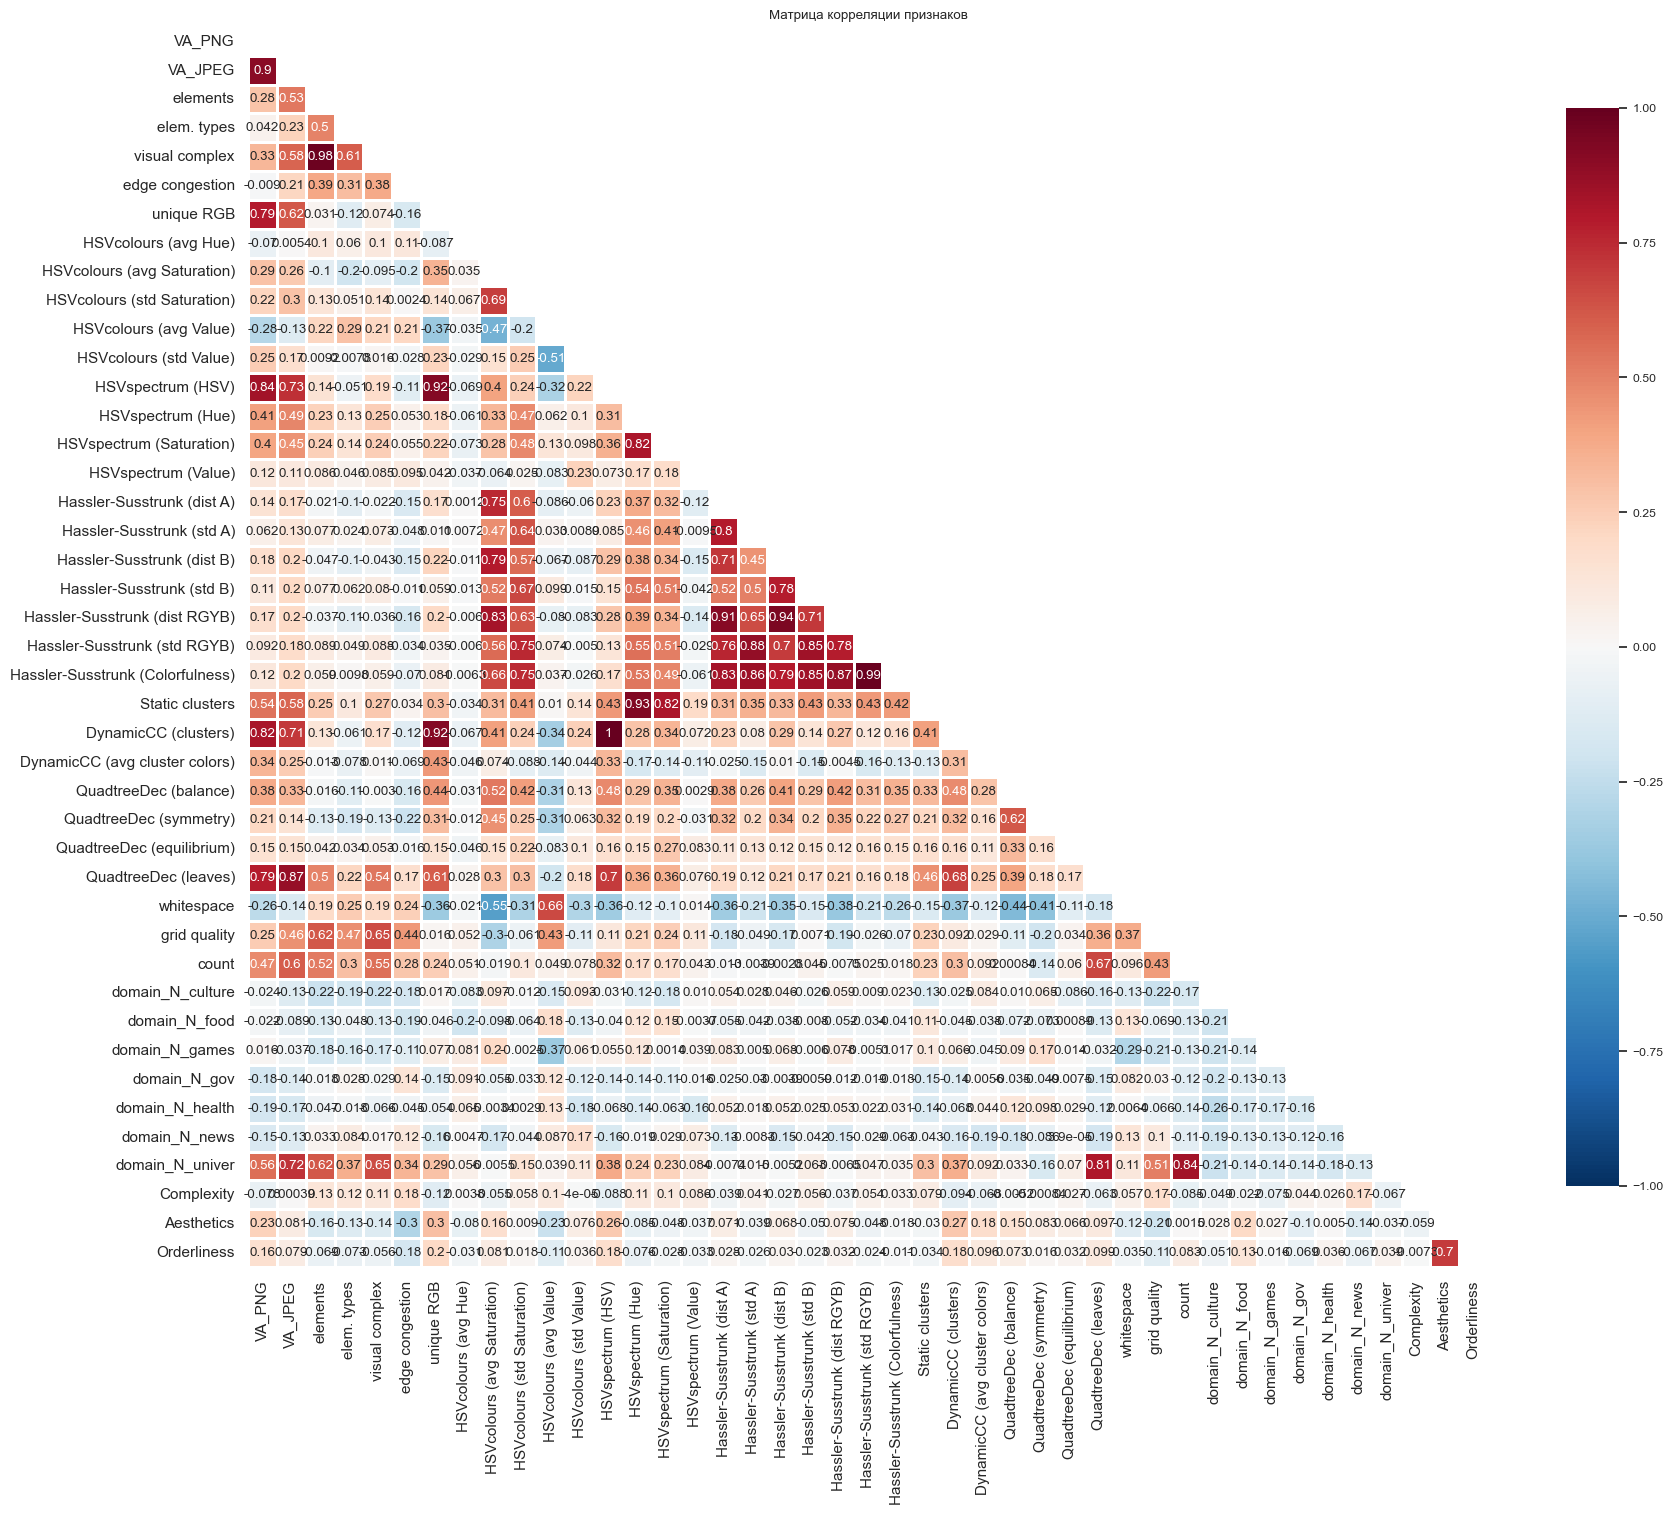

In [27]:
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
    ##################
    data=corr_df,   ### <<<- объект-матрица корреляции
    ##################
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap = 'RdBu_r',
    mask=mask,   # применить маску
    square=True, # форма ячейки - квадрат
    linewidths=1.0, # зазор между ячейки
    cbar_kws={"shrink": .7}  # уменьшить размер легенды
)
plt.title(u'Матрица корреляции признаков')

Получим столбец для целевого признака.

In [28]:
# Последовательное применение операции:
# - получить единственный столбец,
# - получить абсолютные значения,
# - отсортировать
corr_df[['Aesthetics']].abs().sort_values(by="Aesthetics")

,Aesthetics
count,0.001536
domain_N_health,0.005025
HSVcolours (std Saturation),0.008976
Hassler-Susstrunk (Colorfulness),0.017666
domain_N_games,0.026665
domain_N_culture,0.028017
Static clusters,0.029896
domain_N_univer,0.036959
HSVspectrum (Value),0.037273
Hassler-Susstrunk (std A),0.039361


In [29]:
features = [column for column in corr_df.columns if column not in target]
features

['VA_PNG',
 'VA_JPEG',
 'elements',
 'elem. types',
 'visual complex',
 'edge congestion',
 'unique RGB',
 'HSVcolours (avg Hue)',
 'HSVcolours (avg Saturation)',
 'HSVcolours (std Saturation)',
 'HSVcolours (avg Value)',
 'HSVcolours (std Value)',
 'HSVspectrum (HSV)',
 'HSVspectrum (Hue)',
 'HSVspectrum (Saturation)',
 'HSVspectrum (Value)',
 'Hassler-Susstrunk (dist A)',
 'Hassler-Susstrunk (std A)',
 'Hassler-Susstrunk (dist B)',
 'Hassler-Susstrunk (std B)',
 'Hassler-Susstrunk (dist RGYB)',
 'Hassler-Susstrunk (std RGYB)',
 'Hassler-Susstrunk (Colorfulness)',
 'Static clusters',
 'DynamicCC (clusters)',
 'DynamicCC (avg cluster colors)',
 'QuadtreeDec (balance)',
 'QuadtreeDec (symmetry)',
 'QuadtreeDec (equilibrium)',
 'QuadtreeDec (leaves)',
 'whitespace',
 'grid quality',
 'count',
 'domain_N_culture',
 'domain_N_food',
 'domain_N_games',
 'domain_N_gov',
 'domain_N_health',
 'domain_N_news',
 'domain_N_univer']

# Просмотр характеристик выбранных признаков

In [30]:
# # График признаков попарно
# plt.figure(figsize=(7,7))
# %config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков

# sns.pairplot(
#     train_with_target[features + target_A],
#     #hue = 'Type',         # Признак разделения
#     kind="scatter",        # Тип даграмм: reg,scatter
#     diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
#     plot_kws={'alpha':0.3} # прозрачность точек
# )

# Поиск и обработка выбросов

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16500\3467651609.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16,2))


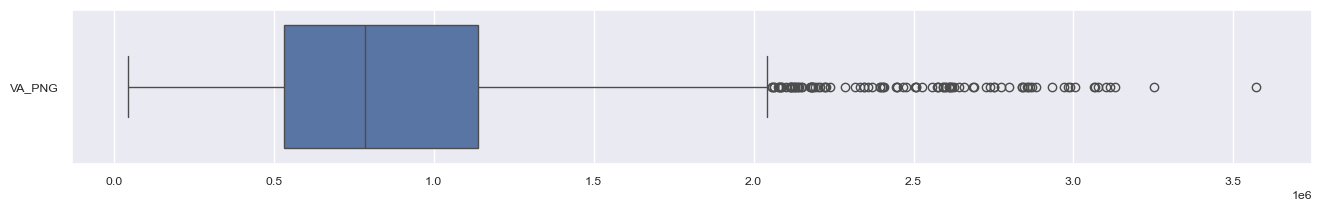

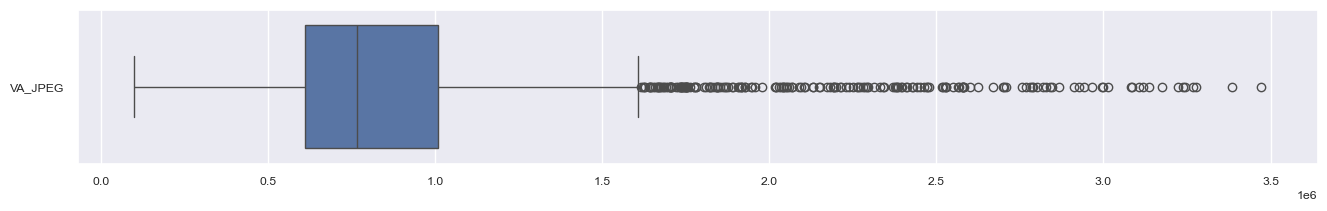

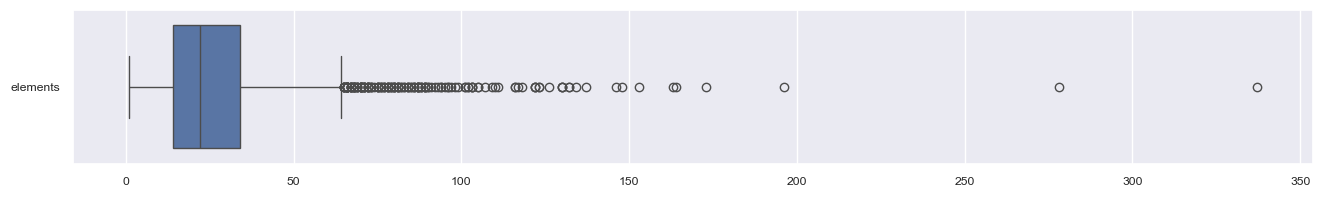

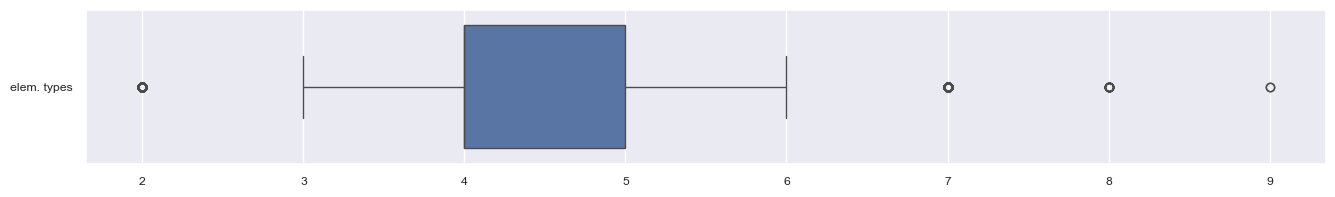

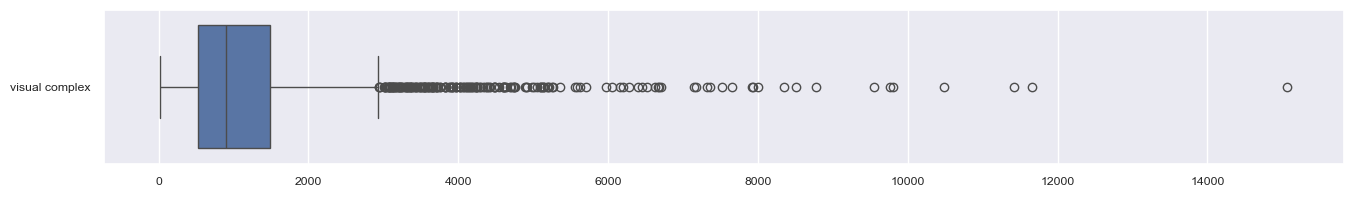

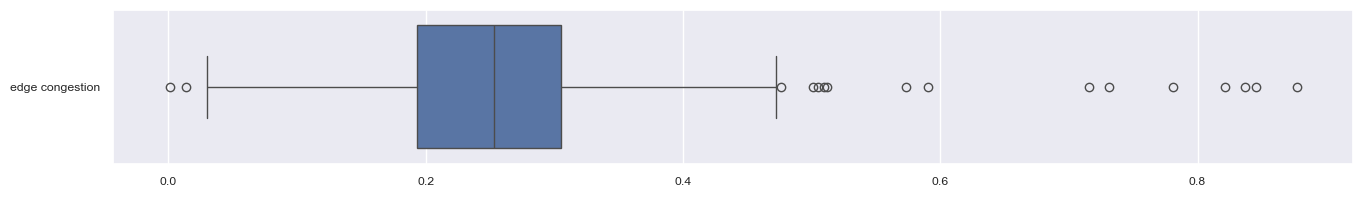

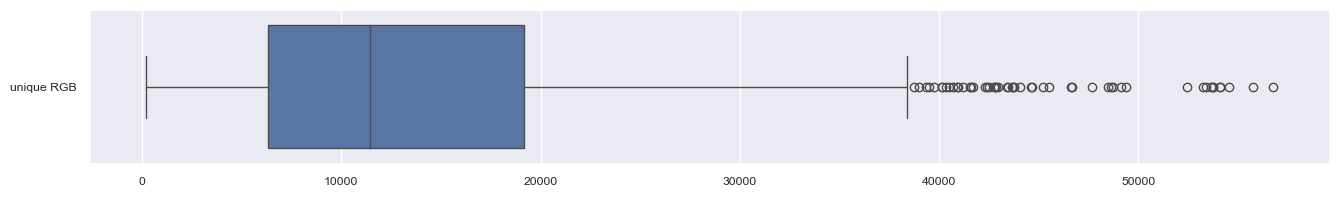

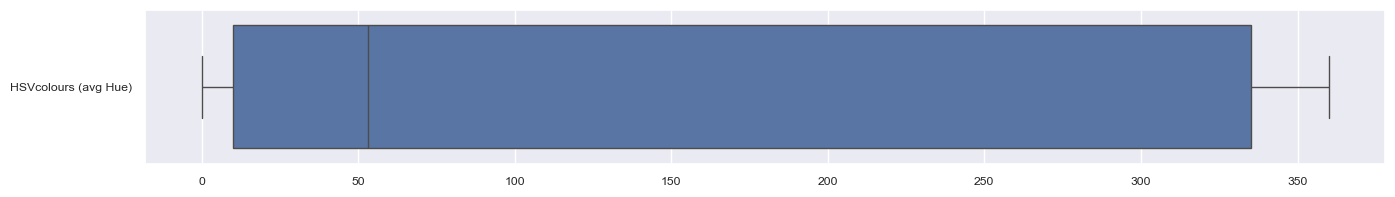

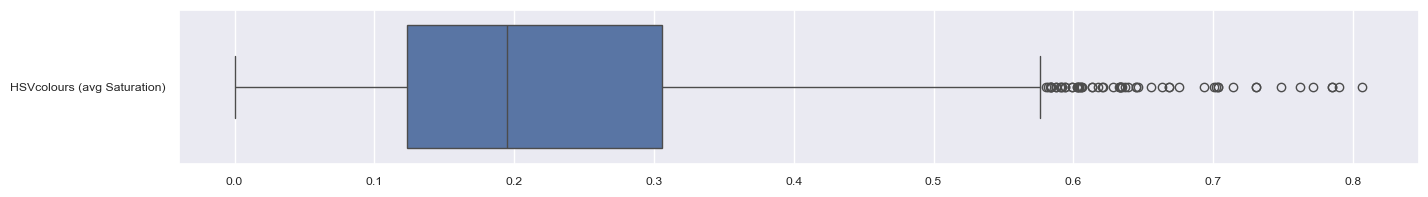

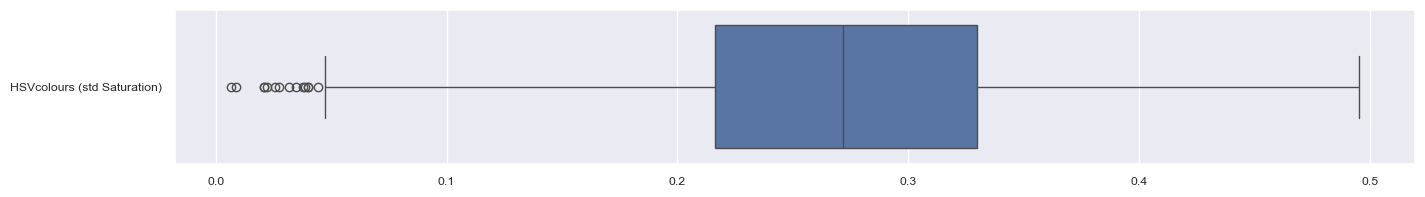

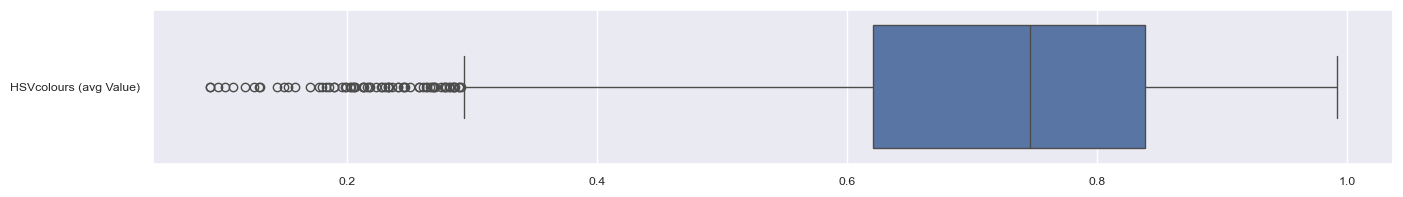

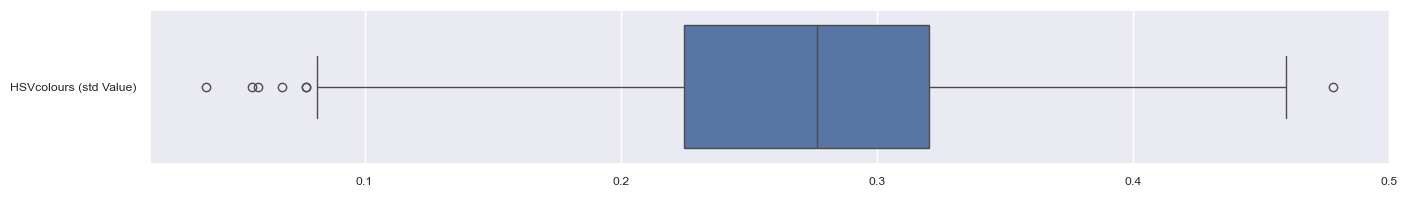

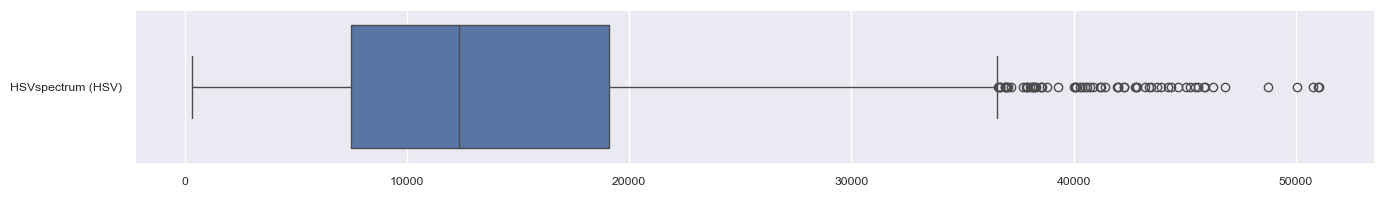

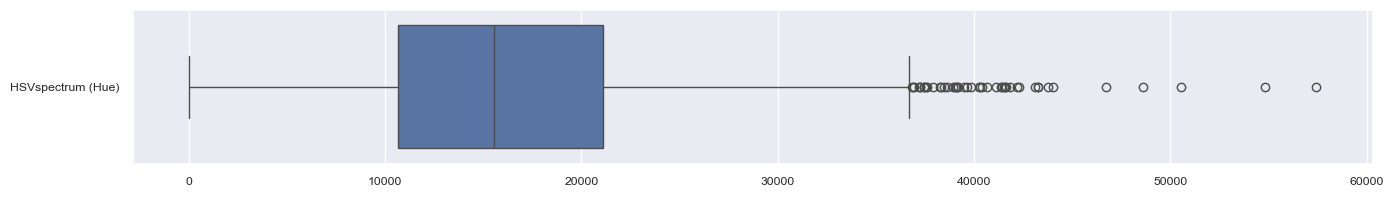

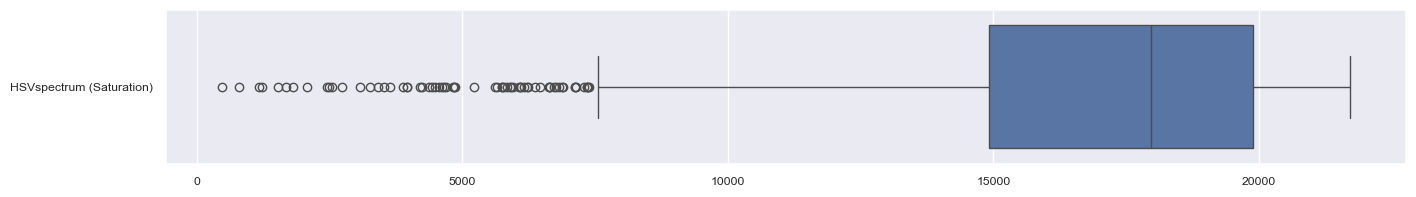

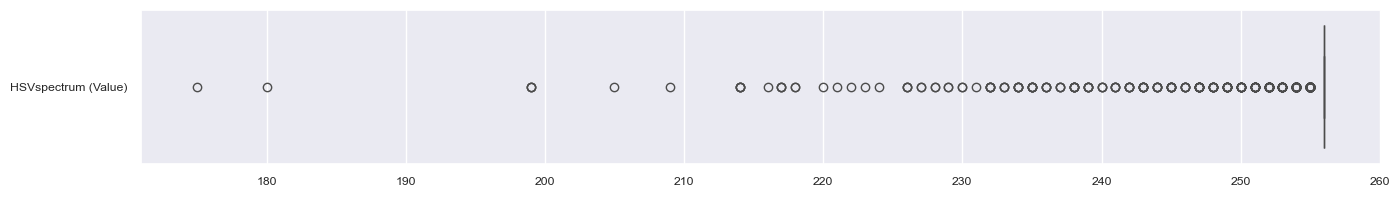

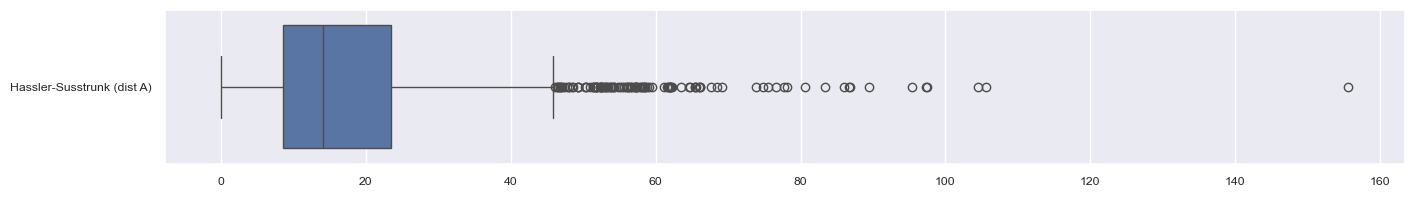

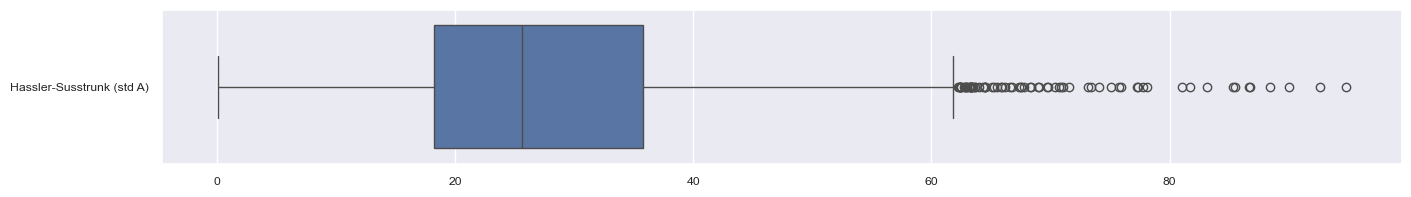

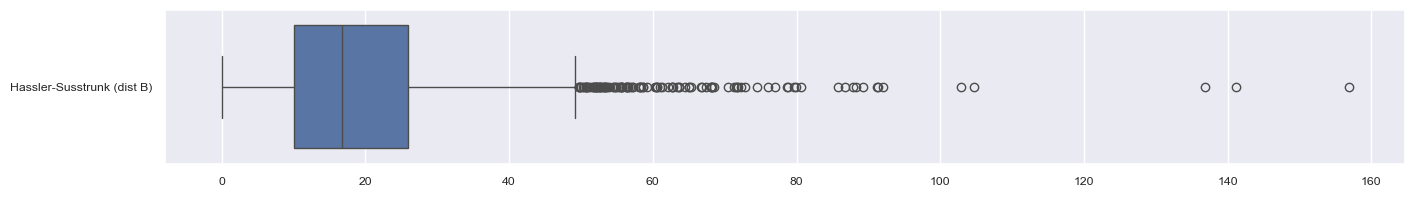

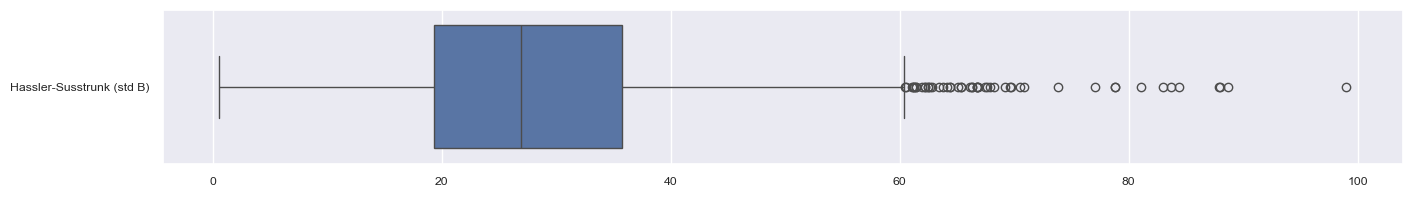

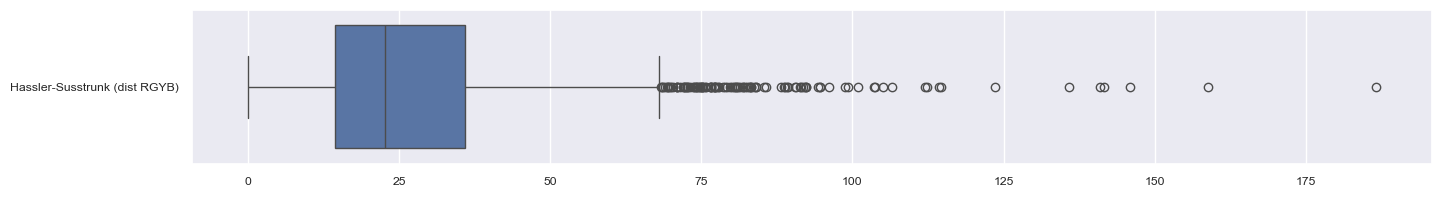

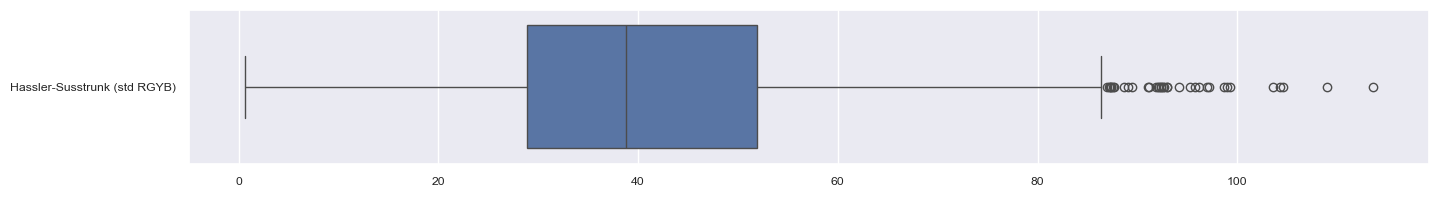

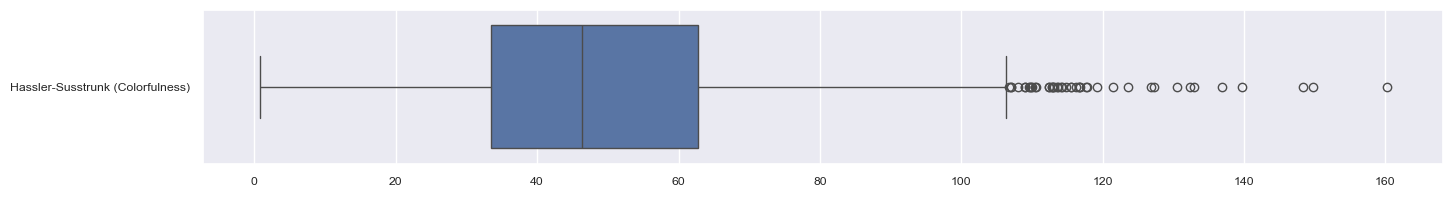

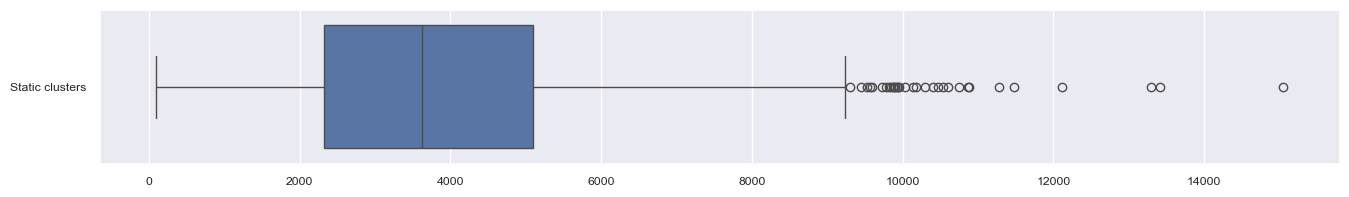

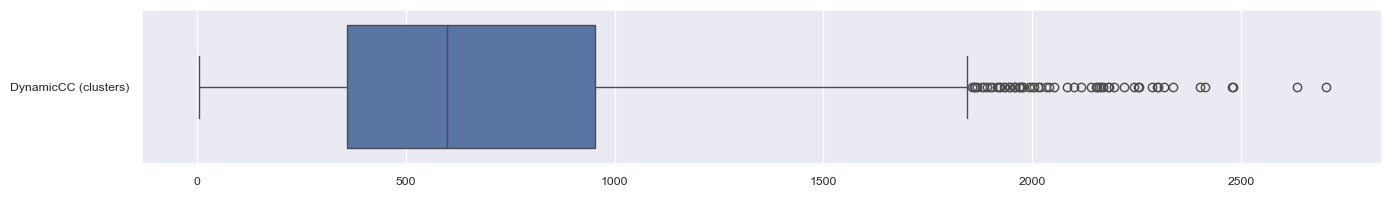

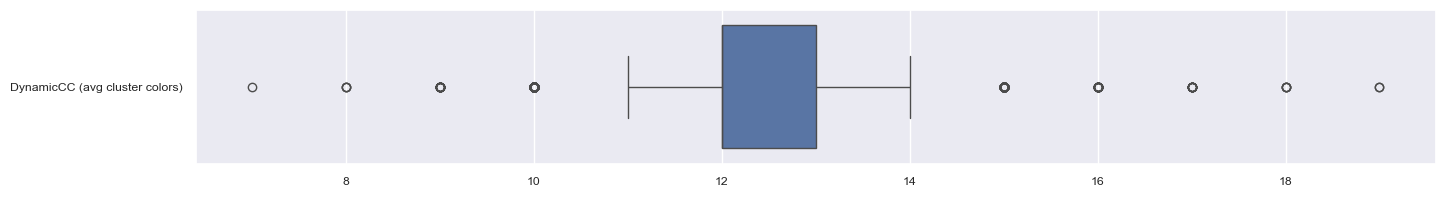

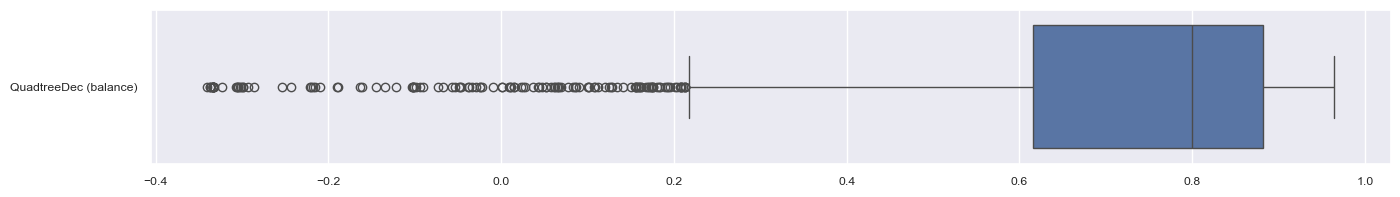

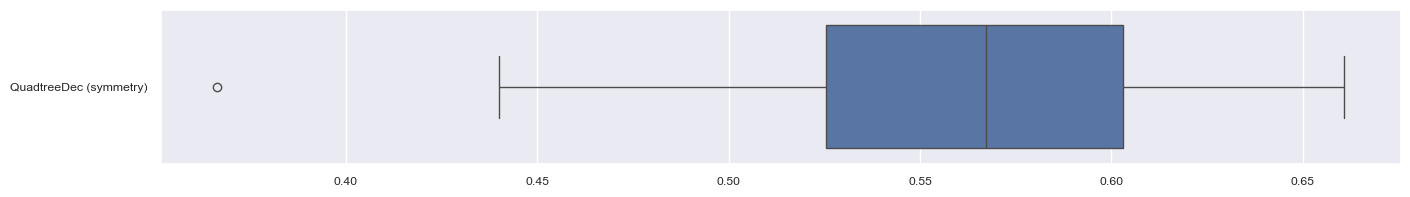

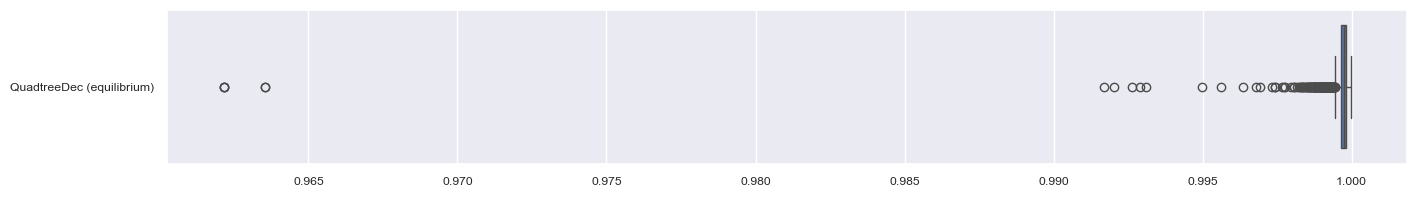

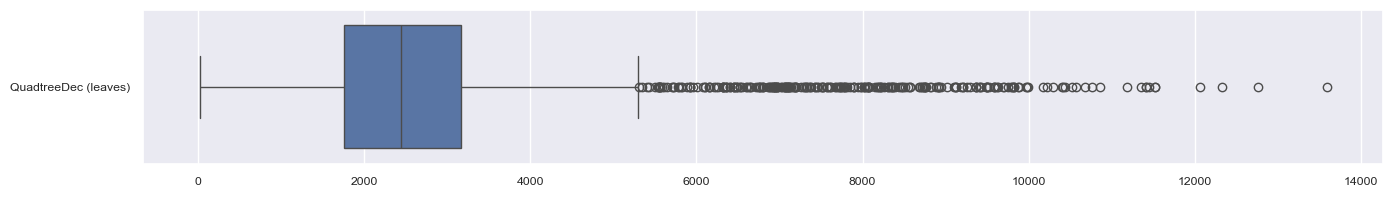

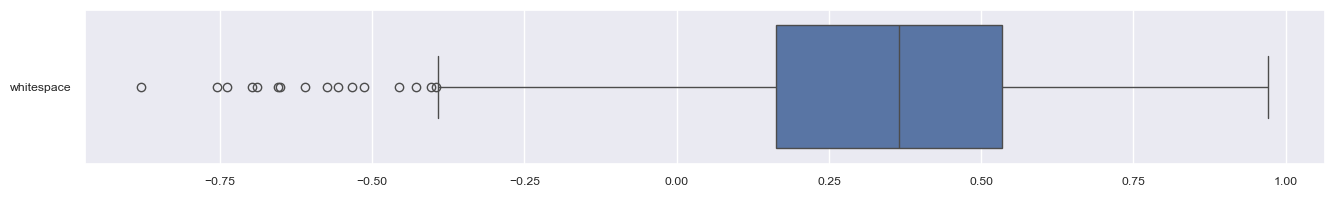

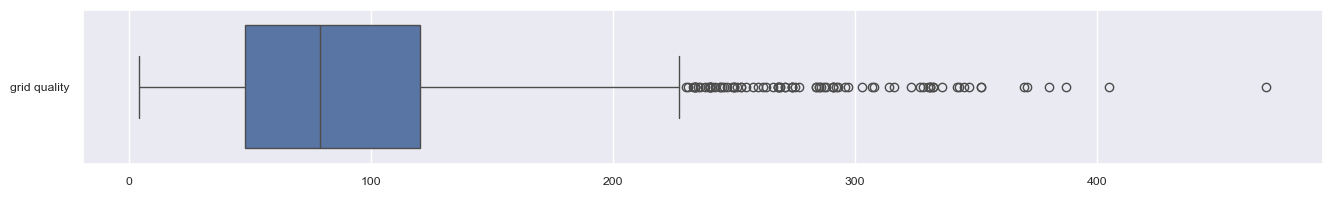

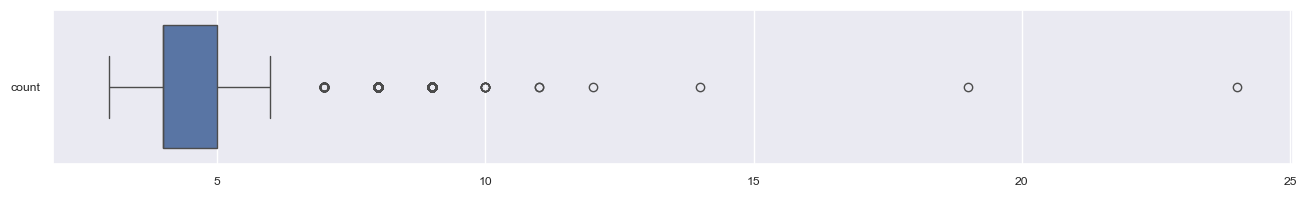

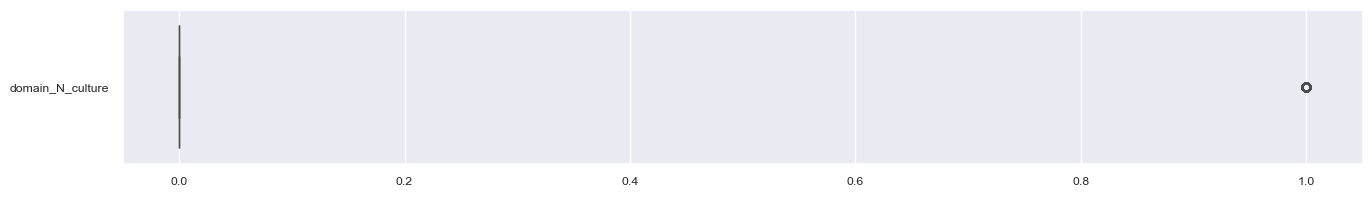

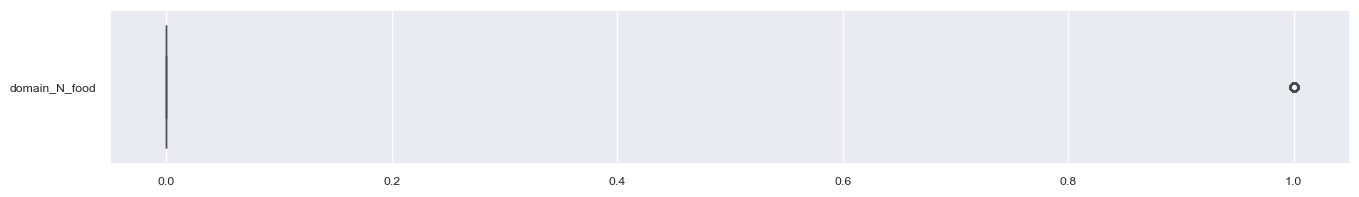

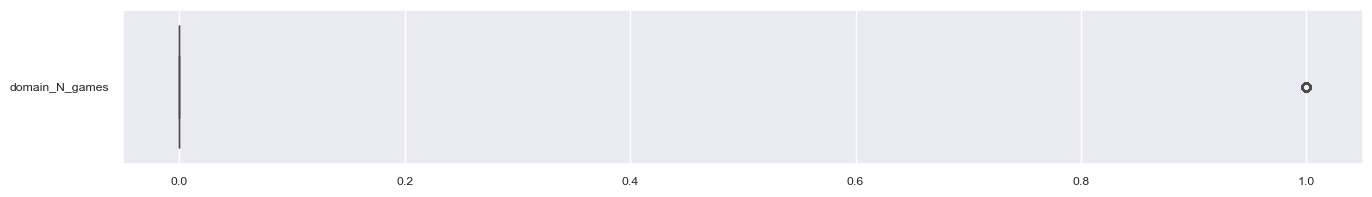

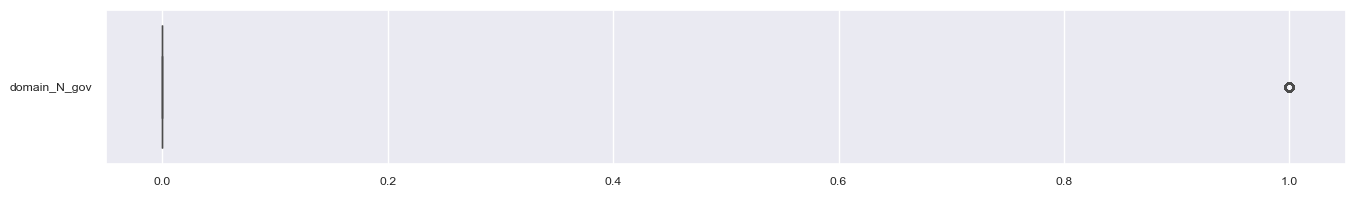

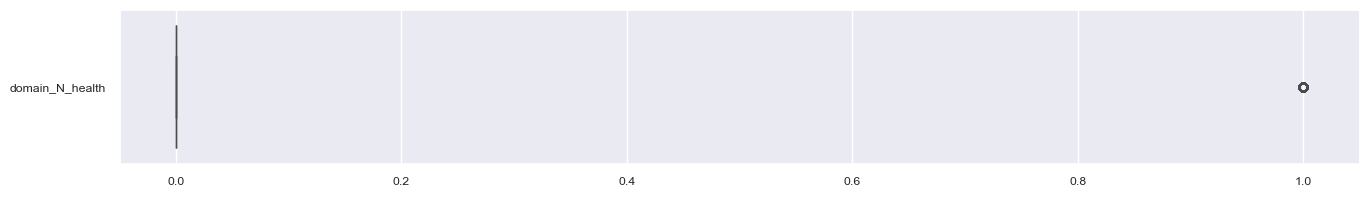

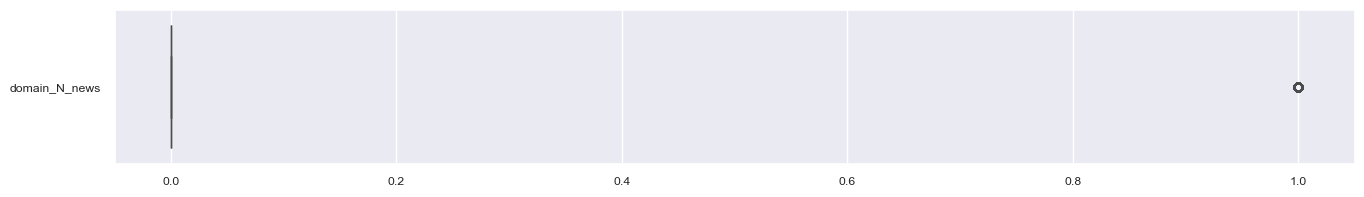

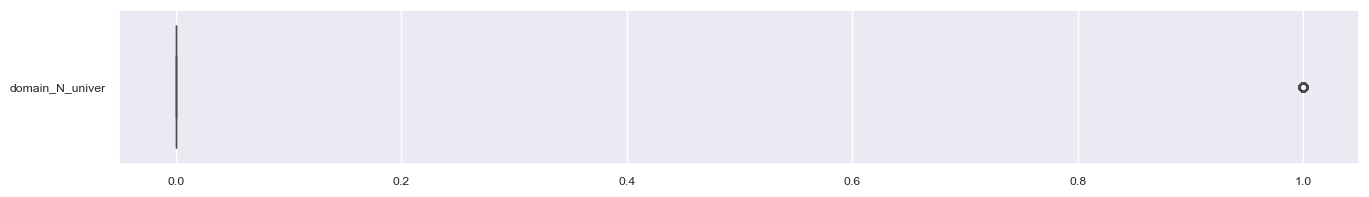

In [31]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features):

    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot( data=x_train[[feature_name]], # данные
                    orient='h' # ориентация графика
                    )

Установим границы значений, для тех объектов таблицы, которые должны остаться

Межквартильный размах (IQR)
Это мера разброса данных, которая показывает диапазон центральных 50% значений. Он вычисляется по формуле:

IQR=Q3−Q1

Q1 — это первый квартиль (25-й процентиль), значение, ниже которого находится 25% всех данных.

Q3 — это третий квартиль (75-й процентиль), значение, ниже которого находится 75% всех данных.

Формулы для усов и выбросов
Наиболее распространённый метод построения усов (метод Тьюки) основан на IQR. Он помогает выявить потенциальные выбросы, то есть значения, которые значительно отличаются от основной массы данных.

Формулы для границ:

Нижняя граница уса: Q1−1.5×IQR

Верхняя граница уса: Q3+1.5×IQR

Как это работает:

Нижний ус простирается от Q1 до самого маленького значения в наборе данных, которое больше или равно нижней границе. Если таких значений нет, то ус доходит до минимального значения в наборе.

Верхний ус простирается от Q3 до самого большого значения, которое меньше или равно верхней границе. Если таких значений нет, то ус доходит до максимального значения.

In [32]:
train_with_target.describe()

,VA_PNG,VA_JPEG,elements,elem. types,visual complex,edge congestion,unique RGB,HSVcolours (avg Hue),HSVcolours (avg Saturation),HSVcolours (std Saturation),...,domain_N_culture,domain_N_food,domain_N_games,domain_N_gov,domain_N_health,domain_N_news,domain_N_univer,Complexity,Aesthetics,Orderliness
count,2.467000e+03,2.467000e+03,2467.00000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,...,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000,2467.000000
mean,8.892988e+05,8.916816e+05,27.90758,4.431293,1248.899254,0.252017,13784.536279,153.675562,0.226149,0.271290,...,0.237941,0.119173,0.121200,0.111066,0.175111,0.107823,0.127685,3.709976,4.168570,4.348984
std,5.316209e+05,4.798105e+05,22.54257,1.287708,1246.890773,0.082192,9970.199237,152.042479,0.140422,0.083057,...,0.425909,0.324058,0.326426,0.314278,0.380139,0.310220,0.333807,0.825880,0.973638,0.858220
min,4.502500e+04,9.937100e+04,1.00000,2.000000,18.860000,0.001155,205.000000,0.000753,0.000316,0.006839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.250000,1.000000
25%,5.302985e+05,6.104125e+05,14.00000,4.000000,520.895000,0.193092,6314.500000,9.943976,0.123670,0.216161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.166700,3.500000,3.750000
50%,7.839280e+05,7.654960e+05,22.00000,4.000000,899.120000,0.253513,11432.000000,53.269198,0.194869,0.271767,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.750000,4.250000,4.400000
75%,1.137430e+06,1.009964e+06,34.00000,5.000000,1487.985000,0.305424,19153.500000,335.224773,0.306082,0.329658,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.250000,4.800000,5.000000
max,3.569335e+06,3.472174e+06,337.00000,9.000000,15066.930000,0.877401,56789.000000,359.999290,0.806770,0.495056,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.500000,7.000000,6.800000


In [33]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
cols = features + target


for col in cols:
        Q1 = train_with_target[col].quantile(0.25)
        Q3 = train_with_target[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 3 * IQR #более мягкие границы: вместо 1.5 * IQR берём 3 * IQR.

        print(f"{col} = ({lower:.2f}, {upper:.2f})")

VA_PNG = (-380398.75, 2958824.50)
VA_JPEG = (11084.50, 2208620.50)
elements = (-16.00, 94.00)
elem. types = (2.50, 8.00)
visual complex = (-929.74, 4389.26)
edge congestion = (0.02, 0.64)
unique RGB = (-12944.00, 57670.50)
HSVcolours (avg Hue) = (-477.98, 1311.07)
HSVcolours (avg Saturation) = (-0.15, 0.85)
HSVcolours (std Saturation) = (0.05, 0.67)
HSVcolours (avg Value) = (0.29, 1.49)
HSVcolours (std Value) = (0.08, 0.61)
HSVspectrum (HSV) = (-10017.50, 54052.00)
HSVspectrum (Hue) = (-5007.50, 52412.50)
HSVspectrum (Saturation) = (7479.50, 34754.00)
HSVspectrum (Value) = (256.00, 256.00)
Hassler-Susstrunk (dist A) = (-13.80, 68.27)
Hassler-Susstrunk (std A) = (-8.01, 88.36)
Hassler-Susstrunk (dist B) = (-13.58, 73.23)
Hassler-Susstrunk (std B) = (-5.32, 85.05)
Hassler-Susstrunk (dist RGYB) = (-17.72, 100.13)
Hassler-Susstrunk (std RGYB) = (-5.60, 120.93)
Hassler-Susstrunk (Colorfulness) = (-10.39, 150.48)
Static clusters = (-1834.50, 13417.00)
DynamicCC (clusters) = (-536.00, 2742.00

VA_PNG 45025 3569335
VA_JPEG 99371.0 3472174.0
elements 1.0 337.0
elem. types 2.0 9.0
visual complex 18.86 15066.93
edge congestion 0.001154957 0.8774009740000001
unique RGB 205.0 56789.0
HSVcolours (avg Hue) 0.0007529139999999 359.99928989999995
HSVcolours (avg Saturation) 0.000316144 0.806770312
HSVcolours (std Saturation) 0.00683912 0.495056401
HSVcolours (avg Value) 0.0904643619999999 0.991538256
HSVcolours (std Value) 0.038027192 0.478291617
HSVspectrum (HSV) 297.0 51034.0
HSVspectrum (Hue) 11.0 57427.0
HSVspectrum (Saturation) 485.0 21706.0
HSVspectrum (Value) 175.0 256.0
Hassler-Susstrunk (dist A) 0.015241319 155.6395793
Hassler-Susstrunk (std A) 0.122893334 94.77995287
Hassler-Susstrunk (dist B) 0.021546875 156.8916597
Hassler-Susstrunk (std B) 0.532704341 98.98730497
Hassler-Susstrunk (dist RGYB) 0.035682706 186.5678914
Hassler-Susstrunk (std RGYB) 0.68886482 113.5597792
Hassler-Susstrunk (Colorfulness) 0.727205887 160.20428069999997
Static clusters 94.0 15050.0
DynamicCC (clu

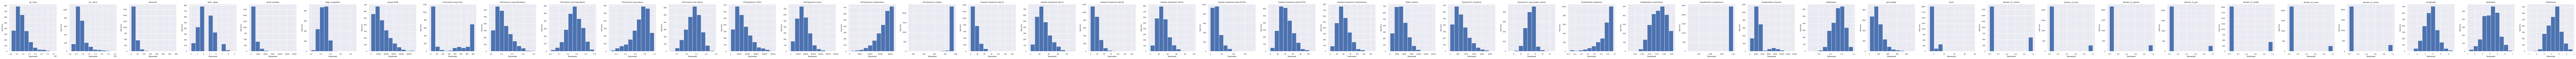

In [34]:
# Строим гистограммы по каждому признаку:
# data[features].hist() #Упрощенный вывод графиков

all_cols = features + target
n = len(all_cols)

plt.figure(figsize=(4*n, 4))

for i, col in enumerate(all_cols, 1):
    plt.subplot(1, n, i)
    plt.hist(train_with_target[col])
    plt.title(col)
    plt.xlabel("Значения")
    plt.ylabel("Частота")

    print(col, train_with_target[col].min(), train_with_target[col].max())

plt.tight_layout()
plt.show()

# Построение модели 1

In [35]:
model_lin = linear_model.LinearRegression()

In [36]:
# Вычислить коэфф. Ki в функции y(x)=Ki*xi + .... + B
# на тренировочном наборе, т.е. обучить модель
model_lin.fit(
    x_train[features],
    y_train
)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_predicted_lin = model_lin.predict(x_test[features])

In [38]:
targets = ['Complexity', 'Aesthetics', 'Orderliness']
feature_names = features

intercepts = model_lin.intercept_          # shape: (3,)
coeffs = model_lin.coef_                   # shape: (3, n_features)

for t_idx, target in enumerate(targets):
    print(f"\n=== Уравнение регрессии для {target} ===")
    
    eq = f"{target} = {intercepts[t_idx]:.4f}"
    
    for f_idx, feature in enumerate(feature_names):
        eq += f" + ({coeffs[t_idx, f_idx]:.4f} * {feature})"
    
    print(eq)

# Табличный вывод
print("\n\n=== Коэффициенты модели в табличном виде ===")
df_coef = pd.DataFrame(coeffs, columns=feature_names, index=targets)
df_coef['intercept'] = intercepts
print(df_coef)



=== Уравнение регрессии для Complexity ===
Complexity = -3.8800 + (-0.0000 * VA_PNG) + (0.0000 * VA_JPEG) + (0.0152 * elements) + (0.0582 * elem. types) + (-0.0003 * visual complex) + (1.1166 * edge congestion) + (-0.0000 * unique RGB) + (-0.0001 * HSVcolours (avg Hue)) + (-0.0821 * HSVcolours (avg Saturation)) + (0.8877 * HSVcolours (std Saturation)) + (-0.2455 * HSVcolours (avg Value)) + (-0.2296 * HSVcolours (std Value)) + (0.0000 * HSVspectrum (HSV)) + (0.0000 * HSVspectrum (Hue)) + (-0.0000 * HSVspectrum (Saturation)) + (0.0066 * HSVspectrum (Value)) + (0.0116 * Hassler-Susstrunk (dist A)) + (-0.0158 * Hassler-Susstrunk (std A)) + (0.0212 * Hassler-Susstrunk (dist B)) + (-0.0196 * Hassler-Susstrunk (std B)) + (-0.0270 * Hassler-Susstrunk (dist RGYB)) + (0.0154 * Hassler-Susstrunk (std RGYB)) + (0.0073 * Hassler-Susstrunk (Colorfulness)) + (0.0000 * Static clusters) + (-0.0008 * DynamicCC (clusters)) + (0.0050 * DynamicCC (avg cluster colors)) + (0.0600 * QuadtreeDec (balance)) + 

## Функции для построения графиков

In [39]:
def PLOTSCATTER(x_train, y_train, x_test, y_test, y_pred, target_name="Price") -> None:
    '''
    Функция построения графиков
    :param x_train: тренировочные признаки (один столбец)
    :param y_train: тренировочные значения целевой переменной
    :param x_test: проверочные признаки (один столбец)
    :param y_test: проверочные значения целевой переменной
    :param y_pred: предсказанные значения целевой переменной
    :param model: обученная модель (LinearRegression)
    :param target_name: название целевой переменной для подписи оси
    '''
    plt.figure(figsize=(15, 5))

    # Точечные диаграммы
    plt.scatter(x_train, y_train, alpha=0.3, label='Тренировочный')
    plt.scatter(x_test, y_test, alpha=0.3, label='Проверочный')

    # --- Исправленная часть для линии регрессии ---
    # Создаем отсортированный набор данных для плавной линии
    sorted_zip = sorted(zip(x_test.values, y_pred))
    x_test_sorted, y_pred_sorted = zip(*sorted_zip)

    plt.plot( # Используем plot вместо scatter
        x_test_sorted, y_pred_sorted,
        lw=3, color='red',
        label=f"Линия регрессии"
    )
    # --- Конец исправления ---

    plt.grid(True)
    plt.legend(loc="best")
    plt.xlabel(x_train.columns[0])
    plt.ylabel(target_name)
    plt.title('График разброса и линия регрессии')
    plt.show()

def PLOTHIST(y_test, y_pred) -> None:
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    plt.figure(figsize=(6,4))

    # Гистограмма и Плотность распределения - sns.distplot
    # data = y_true - y_pred
    sns.histplot( data = y_test - y_pred,
                color="red",
                kde=True, # оценка плотности в виде кривой
                stat="density",# density: общая площадь равна 1
                )

    # Осевая линия
    # plt.plot(
    #     [0, 0],
    #     [0, 10 * pow(10,-7)], '--', lw=2, c='r')

    plt.ylabel(u'Плотность')
    plt.xlabel(u'Значение ошибки')
    plt.title(u'Плотность распределения и гистограмма ошибок');
    plt.show()

def PLOT34(y_test, y_pred) -> None:
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    plt.figure(figsize=(12,6))

    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1, color = "#17becf")
    plt.plot(  [ np.min(y_test), np.max(y_test) ], # x1,x2
               [ np.min(y_test), np.max(y_test) ], # y1,y2
               '--',
               alpha=0.7, lw=3, color = "black")
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7

    # == Диаграмма рассеяния ошибок ==
    # создать второе полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1, color = "#17becf")
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
    plt.grid(True)  # Сетка. Доп параметры color='black', linewidth=0.7
#--------------------------------------------------------------------------

def GET_METRICS_SINGLE(y_test, y_pred):
    """
    Вычисляет и выводит широкий спектр метрик регрессии.
    
    :param y_test: Истинные значения.
    :param y_pred: Предсказанные значения.
    """
    print("------ Метрики качества регрессии ------")
    
    # Основные метрики
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    mse  = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score                   (y_test, y_pred)
    
    print(f"MAE (Mean Absolute Error): {metrics.mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE (Mean Squared Error): {metrics.mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE (Root Mean Squared Error): {metrics.root_mean_squared_error(y_test, y_pred):.4f}")
    print(f"R2 (Coefficient of Determination): {metrics.r2_score(y_test, y_pred):.4f}")
    
    print("\n------ Дополнительные метрики ------")
    print(f"Explained Variance Score: {metrics.explained_variance_score(y_test, y_pred):.4f}")
    print(f"Max Error: {metrics.max_error(y_test, y_pred):.4f}")
    print(f"Median Absolute Error: {metrics.median_absolute_error(y_test, y_pred):.4f}")
    
    # Метрики на основе различных девиансов (отклонений)
    print(f"Mean Poisson Deviance: {metrics.mean_poisson_deviance(y_test, y_pred):.4f}")
    print(f"Mean Gamma Deviance: {metrics.mean_gamma_deviance(y_test, y_pred):.4f}")
    
    # Процентная ошибка
    print(f"Mean Absolute Percentage Error (MAPE): {metrics.mean_absolute_percentage_error(y_test, y_pred):.4f}")

    # Метрики D^2 (коэффициент детерминации для конкретных функций потерь)
    print(f"D2 Absolute Error Score: {metrics.d2_absolute_error_score(y_test, y_pred):.4f}")
    
    # Некоторые метрики могут выдавать ошибку, если предсказания отрицательные, а y_test - нет.
    # Добавим проверку.
    if (y_pred >= 0).all():
        try:
            print(f"Mean Squared Log Error: {metrics.mean_squared_log_error(y_test, y_pred):.4f}")
        except ValueError as e:
            print(f"Не удалось посчитать Mean Squared Log Error: {e}")
    else:
        print("Пропускаем *Log* метрики, т.к. есть отрицательные предсказания.")
    
    # Метрики D2 Tweedie и Pinball Score требуют доп. параметров, поэтому они сложнее в простом вызове
    # D2 Pinball Score (пример для медианы, alpha=0.5)
    print(f"D2 Pinball Score (alpha=0.5): {metrics.d2_pinball_score(y_test, y_pred, alpha=0.5):.4f}")
    # D2 Tweedie Score (пример для power=2, что эквивалентно Gamma deviance)
    print(f"D2 Tweedie Score (power=2): {metrics.d2_tweedie_score(y_test, y_pred, power=2):.4f}")
    return {"MAE":mae, "MSE":mse, "RMSE":rmse, "R2":r2}
#--------------------------------------------------------------------------

### Графики для модели 1

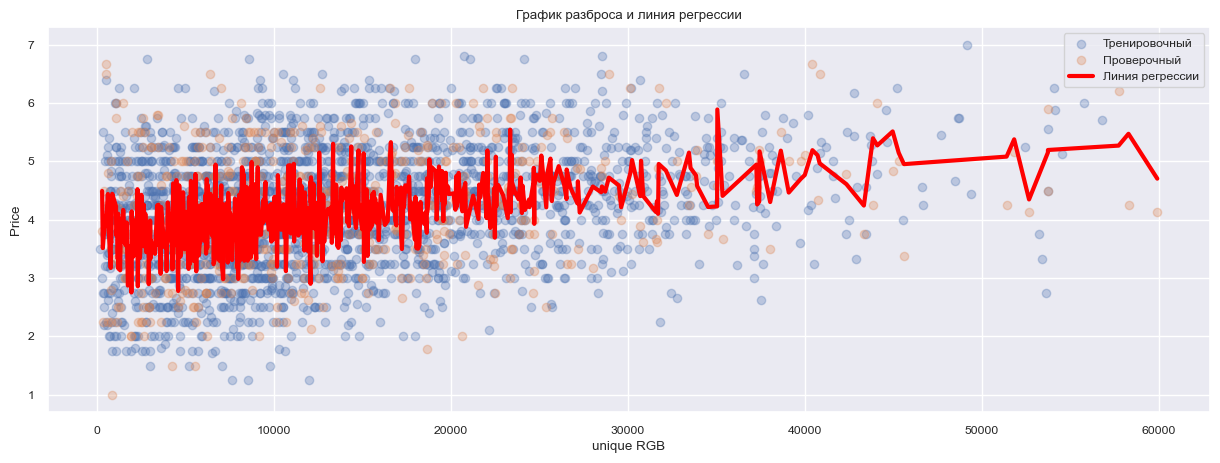

In [40]:
PLOTSCATTER(
    x_train = x_train[['unique RGB']],
    y_train = y_train['Aesthetics'],
    x_test = x_test[['unique RGB']],
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_lin[:, 1]
)

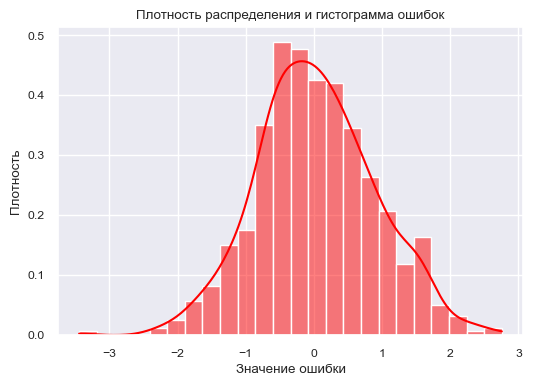

In [41]:
PLOTHIST(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_lin[:, 1]
)

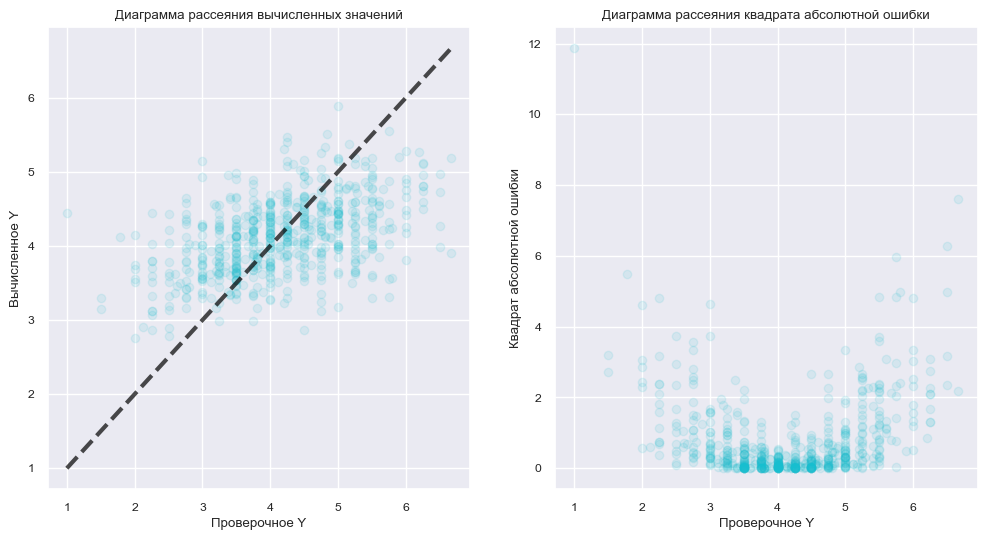

In [42]:
PLOT34(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_lin[:, 1]
)

In [43]:
GET_METRICS_SINGLE(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_lin[:, 1]
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.6888
MSE (Mean Squared Error): 0.7598
RMSE (Root Mean Squared Error): 0.8716
R2 (Coefficient of Determination): 0.2209

------ Дополнительные метрики ------
Explained Variance Score: 0.2220
Max Error: 3.4449
Median Absolute Error: 0.5661
Mean Poisson Deviance: 0.1890
Mean Gamma Deviance: 0.0490
Mean Absolute Percentage Error (MAPE): 0.1838
D2 Absolute Error Score: 0.1396
Mean Squared Log Error: 0.0313
D2 Pinball Score (alpha=0.5): 0.1396
D2 Tweedie Score (power=2): 0.2087


{'MAE': 0.6887746950833884,
 'MSE': 0.7597677292291487,
 'RMSE': 0.8716465621048182,
 'R2': 0.22090009894464102}

### Модель 2

In [44]:
# Создание объекта для преобразования в полином 2-й степени
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

In [45]:
# Преобразование данных
x_train_poly = poly_transformer.fit_transform(x_train[features])
x_test_poly = poly_transformer.transform(x_test[features])

In [46]:
print(f"Исходное количество признаков: {x_train[features].shape[1]}")
print(f"Количество признаков после преобразования: {x_train_poly.shape[1]}")

Исходное количество признаков: 40
Количество признаков после преобразования: 860


In [47]:
new_feature_names = poly_transformer.get_feature_names_out(features)
print("Новые признаки:", new_feature_names)

Новые признаки: ['VA_PNG' 'VA_JPEG' 'elements' 'elem. types' 'visual complex'
 'edge congestion' 'unique RGB' 'HSVcolours (avg Hue)'
 'HSVcolours (avg Saturation)' 'HSVcolours (std Saturation)'
 'HSVcolours (avg Value)' 'HSVcolours (std Value)' 'HSVspectrum (HSV)'
 'HSVspectrum (Hue)' 'HSVspectrum (Saturation)' 'HSVspectrum (Value)'
 'Hassler-Susstrunk (dist A)' 'Hassler-Susstrunk (std A)'
 'Hassler-Susstrunk (dist B)' 'Hassler-Susstrunk (std B)'
 'Hassler-Susstrunk (dist RGYB)' 'Hassler-Susstrunk (std RGYB)'
 'Hassler-Susstrunk (Colorfulness)' 'Static clusters'
 'DynamicCC (clusters)' 'DynamicCC (avg cluster colors)'
 'QuadtreeDec (balance)' 'QuadtreeDec (symmetry)'
 'QuadtreeDec (equilibrium)' 'QuadtreeDec (leaves)' 'whitespace'
 'grid quality' 'count' 'domain_N_culture' 'domain_N_food'
 'domain_N_games' 'domain_N_gov' 'domain_N_health' 'domain_N_news'
 'domain_N_univer' 'VA_PNG^2' 'VA_PNG VA_JPEG' 'VA_PNG elements'
 'VA_PNG elem. types' 'VA_PNG visual complex' 'VA_PNG edge congestio

In [48]:
model_poly = linear_model.LinearRegression()

In [49]:
model_poly.fit(x_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
# Получить вычисленные(predicted) зн. на проверочном наборе
# y_pred = fittedModel.predict(x_test)
y_predicted_poly = model_poly.predict(x_test_poly)

### Графики для 2 модели

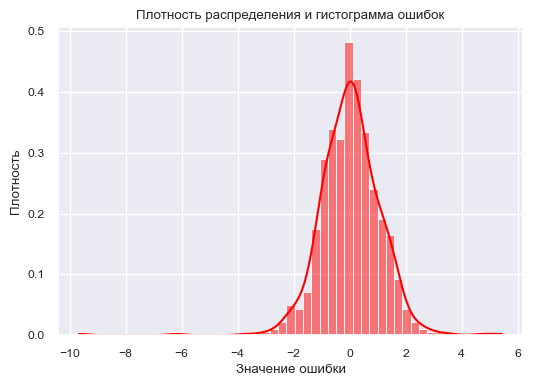

In [51]:
PLOTHIST(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_poly[:, 1]
)

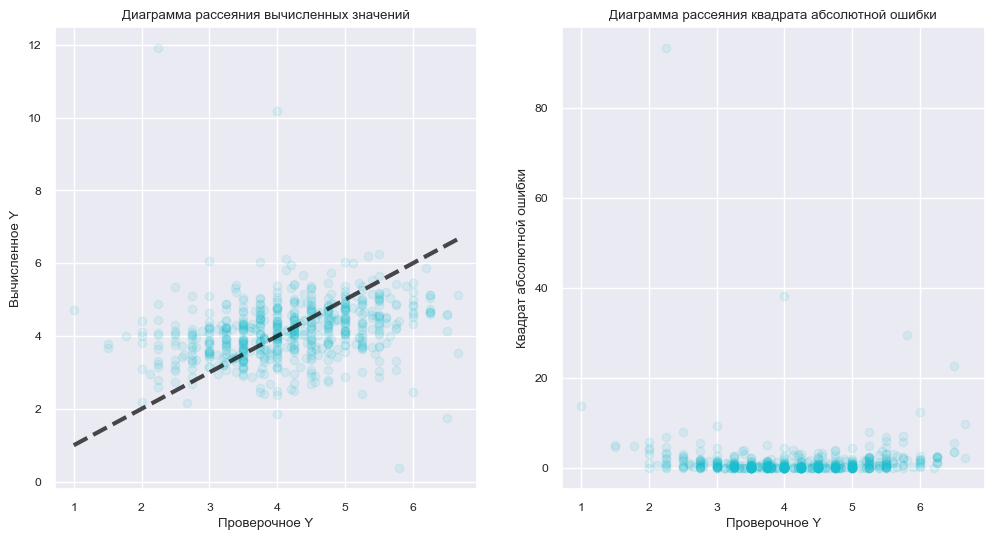

In [52]:
PLOT34(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_poly[:, 1]
)

In [53]:
GET_METRICS_SINGLE(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_poly[:, 1]
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.8046
MSE (Mean Squared Error): 1.2658
RMSE (Root Mean Squared Error): 1.1251
R2 (Coefficient of Determination): -0.2981

------ Дополнительные метрики ------
Explained Variance Score: -0.2975
Max Error: 9.6582
Median Absolute Error: 0.6398
Mean Poisson Deviance: 0.3202
Mean Gamma Deviance: 0.1132
Mean Absolute Percentage Error (MAPE): 0.2163
D2 Absolute Error Score: -0.0050
Mean Squared Log Error: 0.0507
D2 Pinball Score (alpha=0.5): -0.0050
D2 Tweedie Score (power=2): -0.8274


{'MAE': 0.8045860211543897,
 'MSE': 1.2658448209314348,
 'RMSE': 1.125097693949923,
 'R2': -0.2980540457275356}

### Модель 3

In [54]:
# --- 1. Создаем конвейер (Pipeline) ---
# Он будет выполнять шаги последовательно:
# 1. 'scaler': Стандартизировать данные
# 2. 'poly': Создать полиномиальные признаки из стандартизированных данных
# 3. 'ridge': Применить Ridge регрессию к полиномиальным признакам

pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1.0)) 
])

In [55]:
# --- 2. Обучаем весь конвейер ---
# Передаем в .fit() ИСХОДНЫЕ тренировочные данные.
# Pipeline сам их сначала отмасштабирует, потом создаст полиномы и обучит модель.
pipe_ridge.fit(x_train[features], y_train)

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


In [56]:
# --- 3. Делаем предсказания ---
# Передаем в .predict() ИСХОДНЫЕ тестовые данные.
# Pipeline автоматически применит к ним те же преобразования, что и на шаге обучения.
y_predicted_ridge_scaled = pipe_ridge.predict(x_test[features])

### Графики для 3 модели

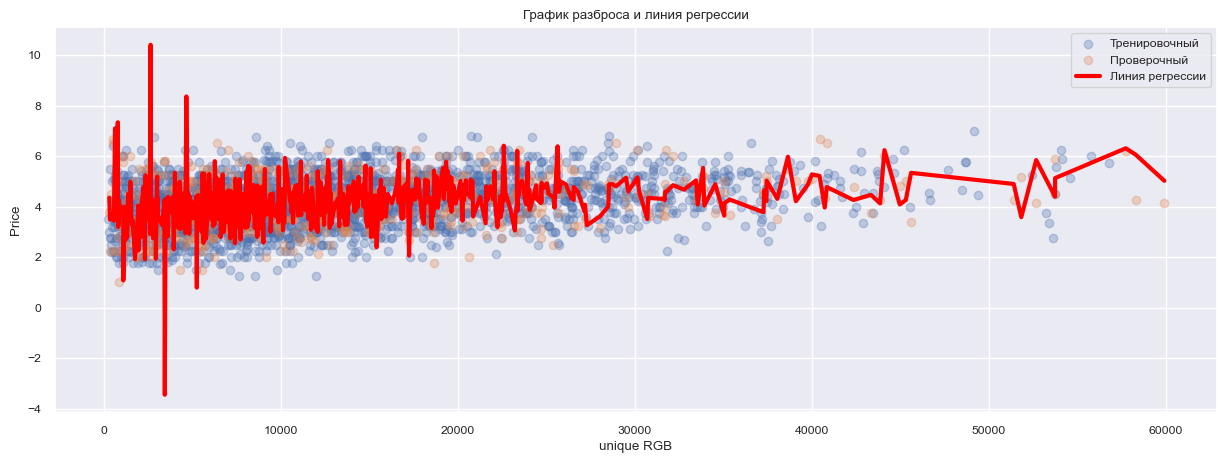

In [57]:
PLOTSCATTER(
    x_train = x_train[['unique RGB']],
    y_train = y_train['Aesthetics'],
    x_test = x_test[['unique RGB']],
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_ridge_scaled[:, 1]
)

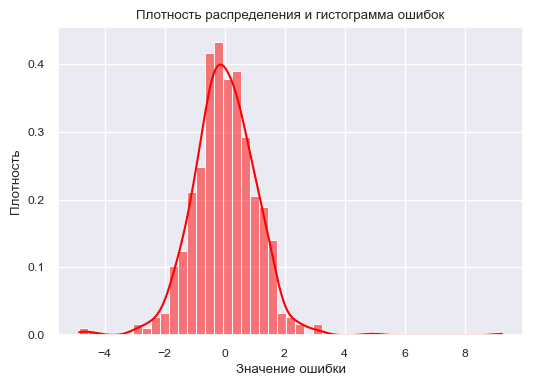

In [58]:
PLOTHIST(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_ridge_scaled[:, 1]
)

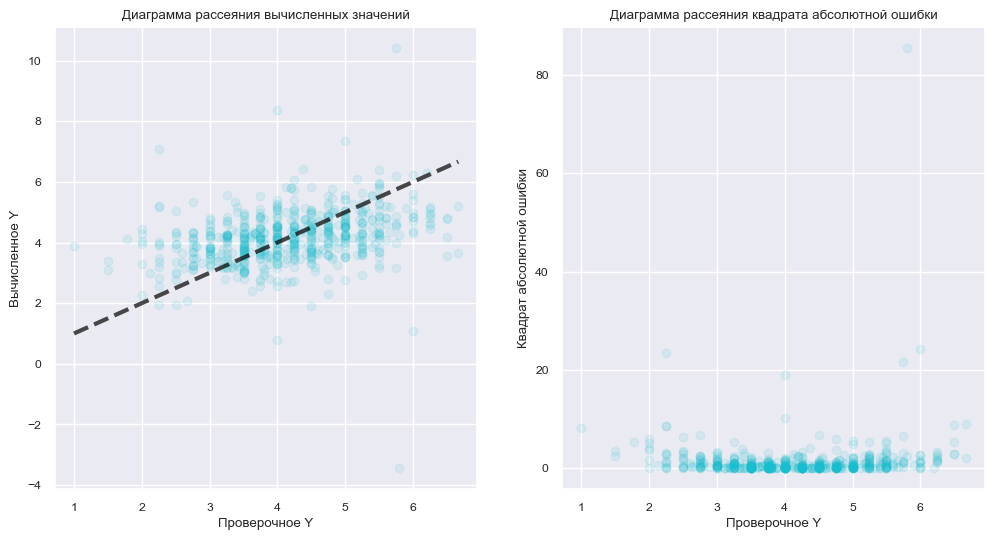

In [59]:
PLOT34(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_ridge_scaled[:, 1]
)

In [60]:
GET_METRICS_SINGLE(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_ridge_scaled[:, 1]
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.8093
MSE (Mean Squared Error): 1.2212
RMSE (Root Mean Squared Error): 1.1051
R2 (Coefficient of Determination): -0.2523

------ Дополнительные метрики ------
Explained Variance Score: -0.2523
Max Error: 9.2442
Median Absolute Error: 0.6349


ValueError: Mean Tweedie deviance error with power=1 can only be used on non-negative y and strictly positive y_pred.

# Модель 4

In [ ]:
# --- Случайный лес (Random Forest) ---
print("--- Модель: Случайный Лес (Random Forest) ---")
# n_estimators - количество "деревьев" в лесу.
# random_state - для воспроизводимости результатов.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Обучаем модель
rf_model.fit(x_train[features], y_train)

# Делаем предсказания
y_predicted_rf = rf_model.predict(x_test[features])

--- Модель: Случайный Лес (Random Forest) ---


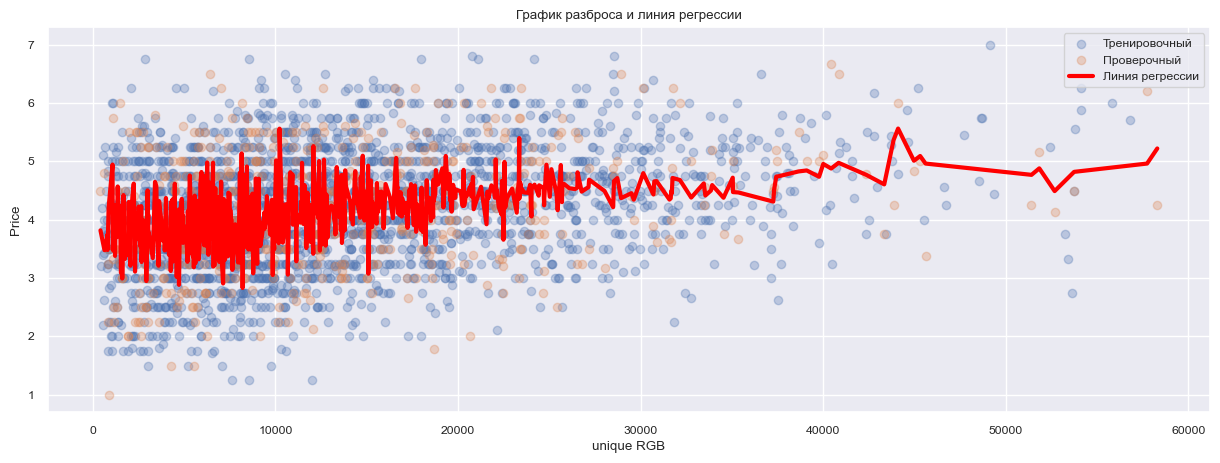

In [ ]:
PLOTSCATTER(
    x_train = x_train[['unique RGB']],
    y_train = y_train['Aesthetics'],
    x_test = x_test[['unique RGB']],
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_rf[:, 1]
)

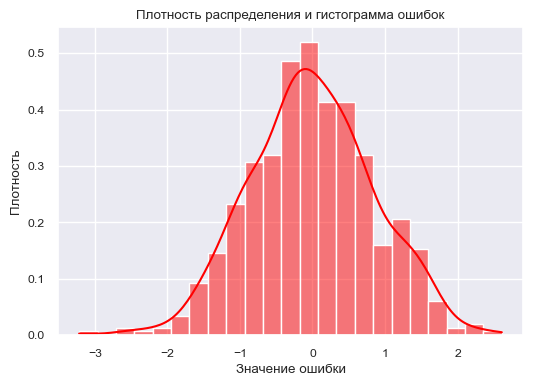

In [ ]:
PLOTHIST(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_rf[:, 1]
)

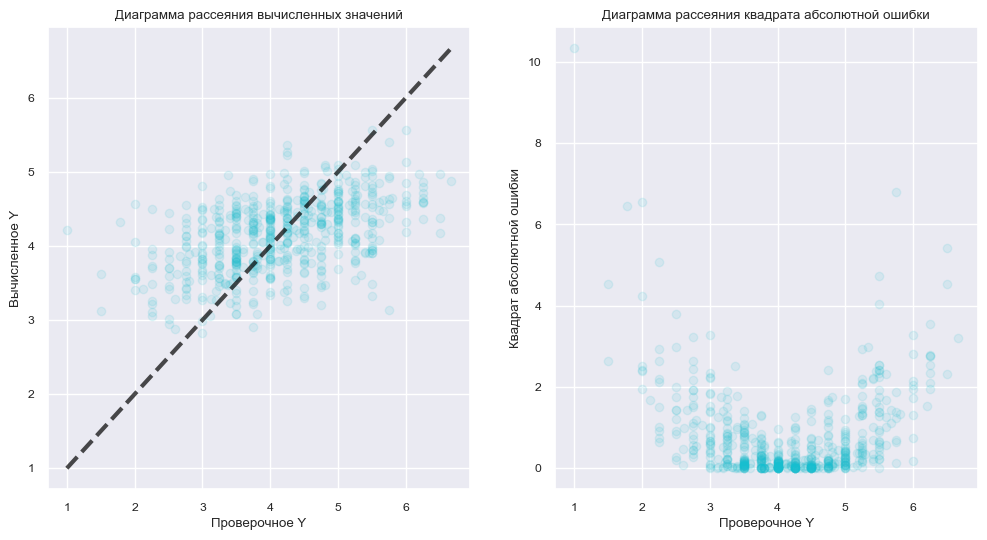

In [ ]:
PLOT34(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_rf[:, 1]
)

In [ ]:
GET_METRICS_SINGLE(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_rf[:, 1]
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.6757
MSE (Mean Squared Error): 0.7254
RMSE (Root Mean Squared Error): 0.8517
R2 (Coefficient of Determination): 0.2368

------ Дополнительные метрики ------
Explained Variance Score: 0.2368
Max Error: 3.2150
Median Absolute Error: 0.5517
Mean Poisson Deviance: 0.1820
Mean Gamma Deviance: 0.0477
Mean Absolute Percentage Error (MAPE): 0.1843
D2 Absolute Error Score: 0.1476
Mean Squared Log Error: 0.0308
D2 Pinball Score (alpha=0.5): 0.1476
D2 Tweedie Score (power=2): 0.2170


{'MAE': 0.6757261300675677,
 'MSE': 0.725391073285289,
 'RMSE': 0.8516989334766651,
 'R2': 0.236763175881461}

# Модель 5

In [ ]:
# Часто дает еще более точные результаты, чем случайный лес.
print("--- Модель: Градиентный Бустинг (Gradient Boosting) ---")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Обучаем модель
gb_model.fit(x_train[features], y_train['Aesthetics'])

# Делаем предсказания
y_predicted_gb = gb_model.predict(x_test[features])

--- Модель: Градиентный Бустинг (Gradient Boosting) ---


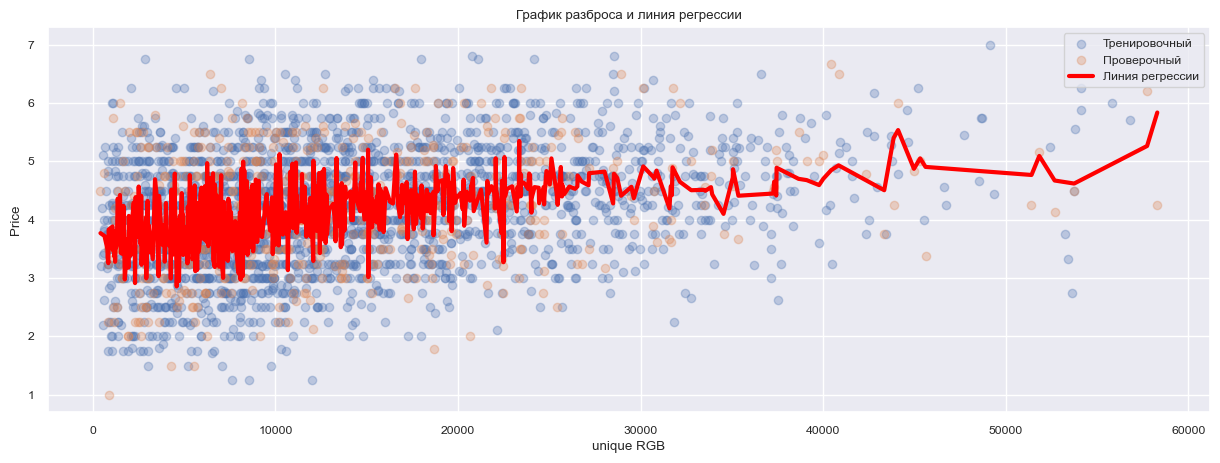

In [ ]:
PLOTSCATTER(
    x_train = x_train[['unique RGB']],
    y_train = y_train['Aesthetics'],
    x_test = x_test[['unique RGB']],
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_gb
)

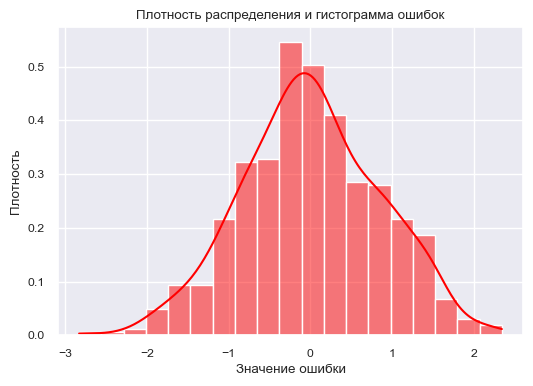

In [ ]:
PLOTHIST(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_gb
)

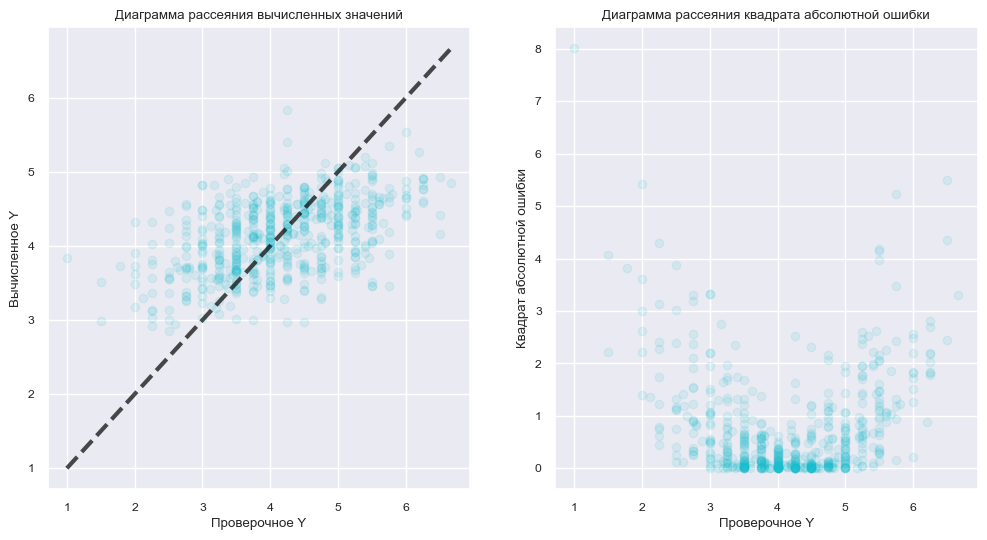

In [ ]:
PLOT34(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_gb
)

In [ ]:
GET_METRICS_SINGLE(
    y_test = y_test['Aesthetics'],
    y_pred = y_predicted_gb
)

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.6698
MSE (Mean Squared Error): 0.7106
RMSE (Root Mean Squared Error): 0.8430
R2 (Coefficient of Determination): 0.2523

------ Дополнительные метрики ------
Explained Variance Score: 0.2524
Max Error: 2.8308
Median Absolute Error: 0.5643
Mean Poisson Deviance: 0.1778
Mean Gamma Deviance: 0.0464
Mean Absolute Percentage Error (MAPE): 0.1808
D2 Absolute Error Score: 0.1551
Mean Squared Log Error: 0.0298
D2 Pinball Score (alpha=0.5): 0.1551
D2 Tweedie Score (power=2): 0.2367


{'MAE': 0.669796505206738,
 'MSE': 0.7106177993755676,
 'RMSE': 0.8429814940884335,
 'R2': 0.2523072142297995}

### Прогнозные значения по моделям

In [ ]:
# Создаем DataFrame

# Gradient Boosting — только Aesthetics
gb_pred = pd.Series(y_predicted_gb, name='Gradient Boosting')

dfs = {}   # словарь для результатов

for i, t in enumerate(target):
    
    df_t = pd.DataFrame({
        'Expected_Rating': y_test[t],
        'Predicted_Linear': y_predicted_lin[:, i],
        'Predicted_Poly': y_predicted_poly[:, i],
        'Predicted_Ridge': y_predicted_ridge_scaled[:, i],
        'Random Forest': y_predicted_rf[:, i]
    })

    if t == 'Aesthetics':
        df_t['Gradient Boosting'] = gb_pred.values

    df_t = df_t.reset_index(drop=True)
    dfs[t] = df_t

In [ ]:
print("Датасет с ожидаемыми и прогнозными значениями:")
display(dfs['Aesthetics'])

Датасет с ожидаемыми и прогнозными значениями:


,Expected_Rating,Predicted_Linear,Predicted_Poly,Predicted_Ridge,Random Forest,Gradient Boosting
0,5.2500,3.607469,3.638512,4.670816,3.798055,3.635560
1,4.2500,4.124862,4.426408,4.431726,4.055974,4.121356
2,3.0000,3.532486,3.224459,4.193618,3.641909,3.565079
3,4.8889,4.190941,4.551074,4.174555,4.455225,4.419901
4,4.7500,4.436789,4.439083,4.650723,4.327333,4.605645
...,...,...,...,...,...,...
587,3.5000,4.139652,3.541533,4.175734,4.230319,4.181551
588,3.5000,3.524835,3.321982,3.051762,3.265421,3.385479
589,2.7500,3.894957,2.959697,3.243393,4.000193,4.131380
590,2.5000,4.068252,4.004552,3.795004,4.228917,4.239793


# Выводы по работе

In [ ]:
# --- Сбор предсказаний от всех моделей ---
predictions = {
    "Linear Regression": y_predicted_lin[:, 1],
    "Polynomial (deg=2)": y_predicted_poly[:, 1],
    "Ridge (on Poly)": y_predicted_ridge_scaled[:, 1],
    "Random Forest": y_predicted_rf[:, 1],
    "Gradient Boosting": y_predicted_gb
}

all_metrics = []

for model_name, y_pred in predictions.items():
    # Получаем словарь с метриками для текущей модели
    metrics_dict = GET_METRICS_SINGLE(y_test['Aesthetics'], y_pred)
    
    # Добавляем название модели в этот словарь
    metrics_dict['Model'] = model_name
    
    # Добавляем готовый словарь в наш общий список
    all_metrics.append(metrics_dict)

# --- Создание и форматирование итоговой таблицы ---
# Создаем DataFrame из списка словарей
metrics_df = pd.DataFrame(all_metrics)

# Устанавливаем 'Model' в качестве индекса для удобства
metrics_df = metrics_df.set_index('Model')

# Упорядочиваем столбцы в логическом порядке
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R2']]

# Сортируем таблицу по R2 (от лучшего к худшему), чтобы сразу видеть лидера
metrics_df = metrics_df.sort_values(by='R2', ascending=False)

# --- Вывод таблицы ---
print("\n" + "="*50)
print("    ИТОГОВАЯ ТАБЛИЦА МЕТРИК ВСЕХ МОДЕЛЕЙ")
print("="*50)

display(
    metrics_df.style.format(
        {
            "MAE": "{:.3f}",
            "MSE": "{:.4f}",
            "RMSE": "{:.4f}",
            "R2": "{:.3f}"
        }))

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.6728
MSE (Mean Squared Error): 0.7141
RMSE (Root Mean Squared Error): 0.8450
R2 (Coefficient of Determination): 0.2487

------ Дополнительные метрики ------
Explained Variance Score: 0.2493
Max Error: 3.4873
Median Absolute Error: 0.5592
Mean Poisson Deviance: 0.1785
Mean Gamma Deviance: 0.0466
Mean Absolute Percentage Error (MAPE): 0.1805
D2 Absolute Error Score: 0.1513
Mean Squared Log Error: 0.0298
D2 Pinball Score (alpha=0.5): 0.1513
D2 Tweedie Score (power=2): 0.2344
------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.7670
MSE (Mean Squared Error): 0.9697
RMSE (Root Mean Squared Error): 0.9847
R2 (Coefficient of Determination): -0.0203

------ Дополнительные метрики ------
Explained Variance Score: -0.0202
Max Error: 4.4600
Median Absolute Error: 0.6442
Mean Poisson Deviance: 0.2429
Mean Gamma Deviance: 0.0643
Mean Absolute Percentage Error (MAPE): 0.2068
D2 Absolute Error Score: 0.0324
Mean Sq

,MAE,MSE,RMSE,R2
Model,,,,
Gradient Boosting,0.670,0.7106,0.8430,0.252
Linear Regression,0.673,0.7141,0.8450,0.249
Random Forest,0.676,0.7254,0.8517,0.237
Polynomial (deg=2),0.767,0.9697,0.9847,-0.020
Ridge (on Poly),0.778,0.9854,0.9927,-0.037


In [ ]:
# --- Сбор предсказаний от всех моделей ---
predictions = {
    "Linear Regression": y_predicted_lin[:, 0],
    "Polynomial (deg=2)": y_predicted_poly[:, 0],
    "Ridge (on Poly)": y_predicted_ridge_scaled[:, 0],
    "Random Forest": y_predicted_rf[:, 0]
}

all_metrics = []

for model_name, y_pred in predictions.items():
    # Получаем словарь с метриками для текущей модели
    metrics_dict = GET_METRICS_SINGLE(y_test['Complexity'], y_pred)
    
    # Добавляем название модели в этот словарь
    metrics_dict['Model'] = model_name
    
    # Добавляем готовый словарь в наш общий список
    all_metrics.append(metrics_dict)

# --- Создание и форматирование итоговой таблицы ---
# Создаем DataFrame из списка словарей
metrics_df = pd.DataFrame(all_metrics)

# Устанавливаем 'Model' в качестве индекса для удобства
metrics_df = metrics_df.set_index('Model')

# Упорядочиваем столбцы в логическом порядке
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R2']]

# Сортируем таблицу по R2 (от лучшего к худшему), чтобы сразу видеть лидера
metrics_df = metrics_df.sort_values(by='R2', ascending=False)

# --- Вывод таблицы ---
print("\n" + "="*50)
print("    ИТОГОВАЯ ТАБЛИЦА МЕТРИК ВСЕХ МОДЕЛЕЙ")
print("="*50)

display(
    metrics_df.style.format(
        {
            "MAE": "{:.3f}",
            "MSE": "{:.4f}",
            "RMSE": "{:.4f}",
            "R2": "{:.3f}"
        }))

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.6313
MSE (Mean Squared Error): 0.6172
RMSE (Root Mean Squared Error): 0.7857
R2 (Coefficient of Determination): 0.0958

------ Дополнительные метрики ------
Explained Variance Score: 0.0962
Max Error: 3.0125
Median Absolute Error: 0.5117
Mean Poisson Deviance: 0.1667
Mean Gamma Deviance: 0.0464
Mean Absolute Percentage Error (MAPE): 0.1845
D2 Absolute Error Score: 0.0206
Mean Squared Log Error: 0.0289
D2 Pinball Score (alpha=0.5): 0.0206
D2 Tweedie Score (power=2): 0.0842
------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.7131
MSE (Mean Squared Error): 0.8634
RMSE (Root Mean Squared Error): 0.9292
R2 (Coefficient of Determination): -0.2648

------ Дополнительные метрики ------
Explained Variance Score: -0.2646
Max Error: 4.5431
Median Absolute Error: 0.5398
Mean Poisson Deviance: 0.2319
Mean Gamma Deviance: 0.0652
Mean Absolute Percentage Error (MAPE): 0.2076
D2 Absolute Error Score: -0.1064
Mean S

,MAE,MSE,RMSE,R2
Model,,,,
Linear Regression,0.631,0.6172,0.7857,0.096
Random Forest,0.636,0.6372,0.7982,0.067
Polynomial (deg=2),0.713,0.8634,0.9292,-0.265
Ridge (on Poly),0.755,0.9602,0.9799,-0.407


In [ ]:
# --- Сбор предсказаний от всех моделей ---
predictions = {
    "Linear Regression": y_predicted_lin[:, 2],
    "Polynomial (deg=2)": y_predicted_poly[:, 2],
    "Ridge (on Poly)": y_predicted_ridge_scaled[:, 2],
    "Random Forest": y_predicted_rf[:, 2]
}

all_metrics = []

for model_name, y_pred in predictions.items():
    # Получаем словарь с метриками для текущей модели
    metrics_dict = GET_METRICS_SINGLE(y_test['Orderliness'], y_pred)
    
    # Добавляем название модели в этот словарь
    metrics_dict['Model'] = model_name
    
    # Добавляем готовый словарь в наш общий список
    all_metrics.append(metrics_dict)

# --- Создание и форматирование итоговой таблицы ---
# Создаем DataFrame из списка словарей
metrics_df = pd.DataFrame(all_metrics)

# Устанавливаем 'Model' в качестве индекса для удобства
metrics_df = metrics_df.set_index('Model')

# Упорядочиваем столбцы в логическом порядке
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R2']]

# Сортируем таблицу по R2 (от лучшего к худшему), чтобы сразу видеть лидера
metrics_df = metrics_df.sort_values(by='R2', ascending=False)

# --- Вывод таблицы ---
print("\n" + "="*50)
print("    ИТОГОВАЯ ТАБЛИЦА МЕТРИК ВСЕХ МОДЕЛЕЙ")
print("="*50)

display(
    metrics_df.style.format(
        {
            "MAE": "{:.3f}",
            "MSE": "{:.4f}",
            "RMSE": "{:.4f}",
            "R2": "{:.3f}"
        }))

------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.6573
MSE (Mean Squared Error): 0.6878
RMSE (Root Mean Squared Error): 0.8293
R2 (Coefficient of Determination): 0.1170

------ Дополнительные метрики ------
Explained Variance Score: 0.1172
Max Error: 2.9571
Median Absolute Error: 0.5564
Mean Poisson Deviance: 0.1648
Mean Gamma Deviance: 0.0406
Mean Absolute Percentage Error (MAPE): 0.1692
D2 Absolute Error Score: 0.0710
Mean Squared Log Error: 0.0270
D2 Pinball Score (alpha=0.5): 0.0710
D2 Tweedie Score (power=2): 0.1103
------ Метрики качества регрессии ------
MAE (Mean Absolute Error): 0.7398
MSE (Mean Squared Error): 0.8695
RMSE (Root Mean Squared Error): 0.9324
R2 (Coefficient of Determination): -0.1162

------ Дополнительные метрики ------
Explained Variance Score: -0.1158
Max Error: 4.2238
Median Absolute Error: 0.6307
Mean Poisson Deviance: 0.2082
Mean Gamma Deviance: 0.0516
Mean Absolute Percentage Error (MAPE): 0.1884
D2 Absolute Error Score: -0.0455
Mean S

,MAE,MSE,RMSE,R2
Model,,,,
Linear Regression,0.657,0.6878,0.8293,0.117
Random Forest,0.676,0.7246,0.8512,0.070
Polynomial (deg=2),0.740,0.8695,0.9324,-0.116
Ridge (on Poly),0.792,0.9957,0.9979,-0.278


### Выводы по результатам исследования регрессионных моделей
В ходе данной работы было проведено исследование с целью прогнозирования субъективных оценок веб-страниц (Aesthetics, Complexity, Orderliness) на основе набора объективных визуальных метрик. Для каждой целевой переменной были построены и оценены несколько регрессионных моделей: Линейная регрессия, Случайный лес, Градиентный бустинг (только для Aesthetics), Полиномиальная регрессия и Ridge-регрессия на полиномиальных признаках.

1. Прогнозирование эстетики (Aesthetics)
Лучшая модель: Градиентный бустинг показал наилучшие результаты, достигнув коэффициента детерминации R² = 0.252. Это означает, что модель способна объяснить примерно 25% дисперсии в оценках эстетики на основе имеющихся визуальных признаков.
Сравнительный анализ: Линейная регрессия и Случайный лес продемонстрировали очень близкие по качеству результаты (R² = 0.249 и R² = 0.237 соответственно). Это говорит о том, что для данной задачи простые линейные зависимости оказались почти так же эффективны, как и более сложные ансамблевые методы.
Неудачные модели: Полиномиальная регрессия и Ridge-регрессия показали отрицательный R² (-0.020 и -0.037), что свидетельствует о полной несостоятельности этих моделей. Их производительность оказалась хуже, чем у простой модели, всегда предсказывающей среднее значение. Вероятнее всего, это связано с сильным переобучением на полиномиальных признаках высокой степени.
Вывод по Aesthetics: Визуальные метрики содержат определённый сигнал для прогнозирования эстетической привлекательности, однако он является слабым. Наиболее подходящими для этой задачи оказались модели градиентного бустинга и линейной регрессии.

2. Прогнозирование сложности (Complexity)
Лучшая модель: Линейная регрессия оказалась наиболее эффективной, хотя и с очень низким качеством прогноза (R² = 0.096). Модель смогла объяснить менее 10% дисперсии в оценках сложности.
Сравнительный анализ: Случайный лес показал ещё более низкий результат (R² = 0.067). Это необычный результат, так как ансамблевые методы обычно превосходят линейные. Возможно, в данных преобладают простые линейные связи, которые Случайный лес не смог эффективно использовать.
Неудачные модели: Полиномиальные модели вновь продемонстрировали крайне низкое качество (R² < 0), что говорит об их неприменимости для данной задачи.
Вывод по Complexity: Имеющиеся визуальные признаки практически не позволяют прогнозировать воспринимаемую сложность веб-страницы. Связь между объективными метриками и субъективной оценкой сложности оказалась крайне слабой.

3. Прогнозирование упорядоченности (Orderliness)
Лучшая модель: Как и в предыдущем случае, Линейная регрессия показала наилучший, хотя и скромный, результат (R² = 0.117). Модель объясняет около 12% дисперсии в оценках упорядоченности.
Сравнительный анализ: Случайный лес снова уступил линейной модели (R² = 0.070).
Неудачные модели: Полиномиальная и Ridge-регрессия потерпели неудачу.
Вывод по Orderliness: Аналогично сложности, прогнозирование упорядоченности на основе данных признаков является малоэффективным. Существует слабая линейная зависимость, но её предсказательная сила невелика.

#### Общее заключение
Исследование показало, что набор используемых объективных визуальных метрик имеет ограниченную предсказательную способность для моделирования субъективных оценок веб-дизайна.

Наиболее прогнозируемой характеристикой оказалась Aesthetics, для которой удалось объяснить около 25% вариативности с помощью модели градиентного бустинга.
Характеристики Complexity и Orderliness оказались практически непредсказуемыми (R² ≈ 0.1). Это говорит о том, что человеческое восприятие сложности и порядка определяется более тонкими или иными факторами, нежели те, что были измерены.
Во всех трёх задачах полиномиальная регрессия показала себя худшей моделью, что указывает на отсутствие сложных нелинейных зависимостей и склонность к переобучению.
Интересным результатом является то, что простая Линейная регрессия часто показывала результаты, сопоставимые или даже превосходящие более сложный метод Случайного леса, что может свидетельствовать о преимущественно линейной природе слабых связей в данных.

In [62]:
targets

['Complexity', 'Aesthetics', 'Orderliness']

In [64]:
# y — DataFrame с колонками ['Complexity', 'Aesthetics', 'Orderliness']
X_ui = df_numeric.drop(columns=targets)
y_ui = df_numeric[targets].values

# --- Преобразование признаков ---
scaler_x_ui = StandardScaler()
X_ui_scaled = scaler_x_ui.fit_transform(X_ui)

# --- Преобразование целей ---
y_ui_scaled = (y_ui - 1) / 6.0  # приведение 1–7 → 0–1

In [66]:
X_ui_train, X_ui_test, y_ui_train, y_ui_test = train_test_split(X_ui_scaled, y_ui_scaled, test_size=0.2, random_state=42)

In [40]:
def get_metrics(y_test, y_pred) -> None:
    '''
    Вычисление и вывод метрик: MAE, RMSE, R2. Используются функции из библиотеки sklearn
    На основе сравнения проверочных и вычисленных.
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    mse  = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score                   (y_test, y_pred)

    print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
    print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
    print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
    print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))
#--------------------------------------------------------------------------

In [73]:
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    reg = model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3).fit(X_ui_train, y_ui_train[:, i])
    y_pred = reg.predict(X_ui_test)
    print(col)
    get_metrics(y_ui_test[:, i], y_pred)

Complexity
MAE :     0.105 (средняя абсолютная ошибка)
MSE :  0.017585 (среднеквадратичная ошибка)
RMSE:  0.132609 (кв. корень из среднеквадратичной ошибки)
R2  :     0.098 (коэфф. детерминации)
Aesthetics
MAE :     0.113 (средняя абсолютная ошибка)
MSE :  0.020400 (среднеквадратичная ошибка)
RMSE:  0.142829 (кв. корень из среднеквадратичной ошибки)
R2  :     0.257 (коэфф. детерминации)
Orderliness
MAE :     0.107 (средняя абсолютная ошибка)
MSE :  0.018006 (среднеквадратичная ошибка)
RMSE:  0.134188 (кв. корень из среднеквадратичной ошибки)
R2  :     0.104 (коэфф. детерминации)


In [76]:
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    reg = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_ui_train, y_ui_train[:, i])
    y_pred = reg.predict(X_ui_test)
    print(col)
    get_metrics(y_ui_test[:, i], y_pred)

Complexity
MAE :     0.105 (средняя абсолютная ошибка)
MSE :  0.017572 (среднеквадратичная ошибка)
RMSE:  0.132560 (кв. корень из среднеквадратичной ошибки)
R2  :     0.099 (коэфф. детерминации)
Aesthetics
MAE :     0.113 (средняя абсолютная ошибка)
MSE :  0.020275 (среднеквадратичная ошибка)
RMSE:  0.142389 (кв. корень из среднеквадратичной ошибки)
R2  :     0.261 (коэфф. детерминации)
Orderliness
MAE :     0.109 (средняя абсолютная ошибка)
MSE :  0.018425 (среднеквадратичная ошибка)
RMSE:  0.135737 (кв. корень из среднеквадратичной ошибки)
R2  :     0.084 (коэфф. детерминации)


In [72]:
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_ui_train, y_ui_train[:, i])
    y_pred = reg.predict(X_ui_test)
    print(col)
    get_metrics(y_ui_test[:, i], y_pred)

Complexity
MAE :     0.106 (средняя абсолютная ошибка)
MSE :  0.017940 (среднеквадратичная ошибка)
RMSE:  0.133942 (кв. корень из среднеквадратичной ошибки)
R2  :     0.080 (коэфф. детерминации)
Aesthetics
MAE :     0.116 (средняя абсолютная ошибка)
MSE :  0.020924 (среднеквадратичная ошибка)
RMSE:  0.144650 (кв. корень из среднеквадратичной ошибки)
R2  :     0.238 (коэфф. детерминации)
Orderliness
MAE :     0.108 (средняя абсолютная ошибка)
MSE :  0.018212 (среднеквадратичная ошибка)
RMSE:  0.134952 (кв. корень из среднеквадратичной ошибки)
R2  :     0.094 (коэфф. детерминации)


In [75]:
param_grid_updated = {
    'max_depth': [2, 3, 4],           # Позволяем деревьям быть глубже
    'learning_rate': [0.05, 0.1, 0.2],       # Стандартный хороший выбор
    'n_estimators': [50, 100, 200],    # Больше деревьев для медленного обучения
    'colsample_bytree': [0.8, 1.0],     # Выбор между использованием всех признаков или их части
    'subsample': [0.8, 1.0],            # Добавляем регуляризацию по строкам
    'gamma': [0.1, 0.2]                 # Немного увеличиваем минимальную регуляризацию
}

# 2. Создаем модель XGBRegressor
# Не указываем параметры, которые будем перебирать
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 3. Запускаем поиск по сетке для каждой целевой переменной
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    print(f"--- Tuning for: {col} ---")
    
    # Создаем GridSearchCV
    # cv=3 означает 3-кратную кросс-валидацию. Это важно для надежной оценки.
    # scoring='neg_mean_squared_error' - стандартная метрика для регрессии в GridSearchCV. 
    # n_jobs=-1 использует все доступные ядра процессора для ускорения.
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid_updated,
        cv=3,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
    # Обучаем GridSearchCV на тренировочных данных
    grid_search.fit(X_ui_train, y_ui_train[:, i])
    
    # Получаем лучшую модель
    best_reg = grid_search.best_estimator_
    
    # Выводим лучшие параметры
    print(f"Best parameters for {col}: {grid_search.best_params_}")
    
    # Делаем предсказание и оцениваем качество
    y_pred = best_reg.predict(X_ui_test)
    print(f"Metrics for {col} with best parameters:")
    get_metrics(y_ui_test[:, i], y_pred)
    print("\n" + "="*30 + "\n")

--- Tuning for: Complexity ---
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Complexity: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 50, 'subsample': 1.0}
Metrics for Complexity with best parameters:
MAE :     0.105 (средняя абсолютная ошибка)
MSE :  0.017397 (среднеквадратичная ошибка)
RMSE:  0.131899 (кв. корень из среднеквадратичной ошибки)
R2  :     0.108 (коэфф. детерминации)


--- Tuning for: Aesthetics ---
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Aesthetics: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Metrics for Aesthetics with best parameters:
MAE :     0.114 (средняя абсолютная ошибка)
MSE :  0.020695 (среднеквадратичная ошибка)
RMSE:  0.143859 (кв. корень из среднеквадратичной ошибки)
R2  :     0.246 (коэфф. детерминации)


--- Tuning for: Orderliness ---
Fitting 3 folds for

In [77]:
# 1. Создаем модель GradientBoostingRegressor
# random_state важен для воспроизводимости результатов
model_gb = GradientBoostingRegressor(random_state=42)

# 2. Определяем сетку параметров (выберите полную или упрощенную)
param_grid_gb = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt', 0.8],
    'min_samples_leaf': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# 3. Запускаем поиск по сетке для каждой целевой переменной
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    print(f"--- Tuning GradientBoostingRegressor for: {col} ---")
    
    # Создаем GridSearchCV
    grid_search_gb = GridSearchCV(
        estimator=model_gb,
        param_grid=param_grid_gb,
        cv=3,  # 3-кратная кросс-валидация
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1  # Используем все ядра процессора
    )
    
    # Обучаем GridSearchCV на тренировочных данных
    # Убедитесь, что используете правильные данные
    grid_search_gb.fit(X_ui_train, y_ui_train[:, i])
    
    # Получаем лучшую модель из поиска
    best_reg_gb = grid_search_gb.best_estimator_
    
    # Выводим лучшие параметры
    print(f"Best parameters for {col}: {grid_search_gb.best_params_}")
    
    # Делаем предсказание и оцениваем качество
    y_pred = best_reg_gb.predict(X_ui_test)
    print(f"Metrics for {col} with best parameters:")
    get_metrics(y_ui_test[:, i], y_pred) # Убедитесь, что название функции правильное
    print("\n" + "="*30 + "\n")

--- Tuning GradientBoostingRegressor for: Complexity ---
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Complexity: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 200, 'subsample': 1.0}
Metrics for Complexity with best parameters:
MAE :     0.104 (средняя абсолютная ошибка)
MSE :  0.017377 (среднеквадратичная ошибка)
RMSE:  0.131820 (кв. корень из среднеквадратичной ошибки)
R2  :     0.109 (коэфф. детерминации)


--- Tuning GradientBoostingRegressor for: Aesthetics ---
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Aesthetics: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 7, 'n_estimators': 200, 'subsample': 1.0}
Metrics for Aesthetics with best parameters:
MAE :     0.113 (средняя абсолютная ошибка)
MSE :  0.020319 (среднеквадратичная ошибка)
RMSE:  0.142546 (кв. корень из среднеквадратичной ошибки)
R2  :     0.260 (коэфф. д

In [24]:
# Путь к папкам
base_dir = r"F:\VLM_Usability\Dataset\Images"
folders = [
    os.path.join(base_dir, "screen1000_1"),
    os.path.join(base_dir, "screen1000_2")]

In [25]:
# Собираем все пути к .png
image_paths = []
for f in folders:
    image_paths += glob(os.path.join(f, "*.png"))

In [26]:
# Соотносим изображения с файлами в таблице
# Создаём словарь имя_файла -> путь
path_dict = {os.path.basename(p): p for p in image_paths}

# Добавляем столбец path, где путь соответствует filename
df["path"] = df["filename"].map(path_dict)

# Удаляем строки, для которых изображения нет
df = df.dropna(subset=["path"]).reset_index(drop=True)

image_paths = df["path"].tolist()

print("После фильтрации изображений:", len(df))
print("Количество изображений:", len(image_paths))

После фильтрации изображений: 3083
Количество изображений: 3083


In [ ]:
df_numeric = df.select_dtypes(include=['number'])

In [10]:
target

['Complexity', 'Aesthetics', 'Orderliness']

In [30]:
X_all = df_numeric.drop(columns=target)
y_all = df_numeric[target].values

# --- Преобразование признаков ---
scaler_x_all = StandardScaler()
X_all_scaled = scaler_x_all.fit_transform(X_all)

In [36]:
uiclip = np.load("F:/VLM_Usability/uiclip_features.npy")
X_final = np.concatenate([X_all_scaled, uiclip], axis=1)
y_final = (y_all - 1) / 6.0

In [38]:
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [46]:
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    reg = model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.05, max_depth=4).fit(X_final_train, y_final_train[:, i])
    y_pred = reg.predict(X_final_test)
    print(col)
    get_metrics(y_final_test[:, i], y_pred)

Complexity
MAE :     0.104 (средняя абсолютная ошибка)
MSE :  0.017001 (среднеквадратичная ошибка)
RMSE:  0.130387 (кв. корень из среднеквадратичной ошибки)
R2  :     0.115 (коэфф. детерминации)
Aesthetics
MAE :     0.109 (средняя абсолютная ошибка)
MSE :  0.018805 (среднеквадратичная ошибка)
RMSE:  0.137130 (кв. корень из среднеквадратичной ошибки)
R2  :     0.318 (коэфф. детерминации)
Orderliness
MAE :     0.108 (средняя абсолютная ошибка)
MSE :  0.017708 (среднеквадратичная ошибка)
RMSE:  0.133072 (кв. корень из среднеквадратичной ошибки)
R2  :     0.120 (коэфф. детерминации)


In [42]:
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    reg = model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_final_train, y_final_train[:, i])
    y_pred = reg.predict(X_final_test)
    print(col)
    get_metrics(y_final_test[:, i], y_pred)

Complexity
MAE :     0.103 (средняя абсолютная ошибка)
MSE :  0.016796 (среднеквадратичная ошибка)
RMSE:  0.129600 (кв. корень из среднеквадратичной ошибки)
R2  :     0.126 (коэфф. детерминации)
Aesthetics
MAE :     0.111 (средняя абсолютная ошибка)
MSE :  0.019426 (среднеквадратичная ошибка)
RMSE:  0.139376 (кв. корень из среднеквадратичной ошибки)
R2  :     0.295 (коэфф. детерминации)
Orderliness
MAE :     0.108 (средняя абсолютная ошибка)
MSE :  0.017697 (среднеквадратичная ошибка)
RMSE:  0.133032 (кв. корень из среднеквадратичной ошибки)
R2  :     0.120 (коэфф. детерминации)


In [43]:
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    reg = model = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_final_train, y_final_train[:, i])
    y_pred = reg.predict(X_final_test)
    print(col)
    get_metrics(y_final_test[:, i], y_pred)

Complexity
MAE :     0.103 (средняя абсолютная ошибка)
MSE :  0.016831 (среднеквадратичная ошибка)
RMSE:  0.129733 (кв. корень из среднеквадратичной ошибки)
R2  :     0.124 (коэфф. детерминации)
Aesthetics
MAE :     0.109 (средняя абсолютная ошибка)
MSE :  0.018656 (среднеквадратичная ошибка)
RMSE:  0.136589 (кв. корень из среднеквадратичной ошибки)
R2  :     0.323 (коэфф. детерминации)
Orderliness
MAE :     0.108 (средняя абсолютная ошибка)
MSE :  0.017950 (среднеквадратичная ошибка)
RMSE:  0.133977 (кв. корень из среднеквадратичной ошибки)
R2  :     0.108 (коэфф. детерминации)


In [44]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1]
}

# 2. Создаем модель XGBRegressor
# Не указываем параметры, которые будем перебирать
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# 3. Запускаем поиск по сетке для каждой целевой переменной
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    print(f"--- Tuning for: {col} ---")
    
    # Создаем GridSearchCV
    # cv=3 означает 3-кратную кросс-валидацию. Это важно для надежной оценки.
    # scoring='neg_mean_squared_error' - стандартная метрика для регрессии в GridSearchCV. 
    # n_jobs=-1 использует все доступные ядра процессора для ускорения.
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
    # Обучаем GridSearchCV на тренировочных данных
    grid_search.fit(X_final_train, y_final_train[:, i])
    
    # Получаем лучшую модель
    best_reg = grid_search.best_estimator_
    
    # Выводим лучшие параметры
    print(f"Best parameters for {col}: {grid_search.best_params_}")
    
    # Делаем предсказание и оцениваем качество
    y_pred = best_reg.predict(X_final_test)
    print(f"Metrics for {col} with best parameters:")
    get_metrics(y_final_test[:, i], y_pred)
    print("\n" + "="*30 + "\n")

--- Tuning for: Complexity ---
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Complexity: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Metrics for Complexity with best parameters:
MAE :     0.102 (средняя абсолютная ошибка)
MSE :  0.016500 (среднеквадратичная ошибка)
RMSE:  0.128453 (кв. корень из среднеквадратичной ошибки)
R2  :     0.142 (коэфф. детерминации)


--- Tuning for: Aesthetics ---
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Aesthetics: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Metrics for Aesthetics with best parameters:
MAE :     0.109 (средняя абсолютная ошибка)
MSE :  0.018729 (среднеквадратичная ошибка)
RMSE:  0.136854 (кв. корень из среднеквадратичной ошибки)
R2  :     0.321 (коэфф. детерминации)


--- Tuning for: Orderliness ---
Fitting 3 folds for each of 108 candidates, totalling 32

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Создаем модель GradientBoostingRegressor
# random_state важен для воспроизводимости результатов
model_gb = GradientBoostingRegressor(random_state=42)

# 2. Определяем сетку параметров (выберите полную или упрощенную)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt', 0.8],
    'min_samples_leaf': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# 3. Запускаем поиск по сетке для каждой целевой переменной
for i, col in enumerate(['Complexity', 'Aesthetics', 'Orderliness']):
    print(f"--- Tuning GradientBoostingRegressor for: {col} ---")
    
    # Создаем GridSearchCV
    grid_search_gb = RandomizedSearchCV(
        estimator=model_gb,
        param_distributions=param_grid_gb,
        n_iter=10,
        cv=3,  # 3-кратная кросс-валидация
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    
    # Обучаем GridSearchCV на тренировочных данных
    # Убедитесь, что используете правильные данные
    grid_search_gb.fit(X_final_train, y_final_train[:, i])
    
    # Получаем лучшую модель из поиска
    best_reg_gb = grid_search_gb.best_estimator_
    
    # Выводим лучшие параметры
    print(f"Best parameters for {col}: {grid_search_gb.best_params_}")
    
    # Делаем предсказание и оцениваем качество
    y_pred = best_reg_gb.predict(X_final_test)
    print(f"Metrics for {col} with best parameters:")
    get_metrics(y_final_test[:, i], y_pred)
    print("\n" + "="*30 + "\n")

--- Tuning GradientBoostingRegressor for: Complexity ---
Best parameters for Complexity: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.05}
Metrics for Complexity with best parameters:
MAE :     0.104 (средняя абсолютная ошибка)
MSE :  0.016660 (среднеквадратичная ошибка)
RMSE:  0.129072 (кв. корень из среднеквадратичной ошибки)
R2  :     0.133 (коэфф. детерминации)


--- Tuning GradientBoostingRegressor for: Aesthetics ---
Best parameters for Aesthetics: {'subsample': 1.0, 'n_estimators': 200, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.05}
Metrics for Aesthetics with best parameters:
MAE :     0.111 (средняя абсолютная ошибка)
MSE :  0.019521 (среднеквадратичная ошибка)
RMSE:  0.139717 (кв. корень из среднеквадратичной ошибки)
R2  :     0.292 (коэфф. детерминации)


--- Tuning GradientBoostingRegressor for: Orderliness ---
Best parameters for Orderliness: {'subsample': 1.0